#**AQM and GAN**





**Analyse Quantitative de la Marche (AQM):**

L'analyse quantitative de la marche est un examen médical dédié pour les partients ayant des troubles de marche. Lors de cet examen réalisé dans un laboratoire, on mesure la cinématique et le cinétique du mouvement en trois dimensions des articulations et des segments corporels, ainsi que les forces qui s’appliquent à ces articulations et enfin l’activité électromyographique des muscles.

**Réseaux antagonistes génératifs (GAN):**

Un GAN est un modèle génératif où deux réseaux sont placés en compétition dans un scénario de théorie des jeux. Le premier réseau est le générateur, il génère un échantillon (ex. une image), tandis que son adversaire, le discriminateur essaie de détecter si un échantillon est réel ou bien s'il est le résultat du générateur. "Selon Wikipédia"

**Contexte du projet:**

On s'intéresse aux angles du mouvement des patients collectés lors des examens AQM, plus particulièrements les angles du bassin ,les hanches et les genous sur les trois axes (X,Y,Z), la cheville sur l'axe X, et le pied sur l'axe Z.

**Problématique:**

Peut-on générer des angles du mouvement grace au GAN? Peut-on construire un modèle de GAN avec une accuracy de 0.5 ?

# **1. Visualisation des données**

1.   Chargement de Tensorflow 2.0
2.   Chargement des données "Data.npz"



## **1.1 Chargement de Tensorflow 2.0**

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [ ]:
import tensorflow as tf
import os
from tensorflow.keras import layers
import numpy as np
import time

## **1.2 Chargement des données "Data.npz"**

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()  ## upload file Data.npz

Saving Data.npz to Data.npz


In [ ]:
with np.load('Data.npz') as data:   ##  the name of 'Data.npz' should've the same name as the saved uploaded file in the previous section"
    Angles = data['Input']

In [ ]:
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt


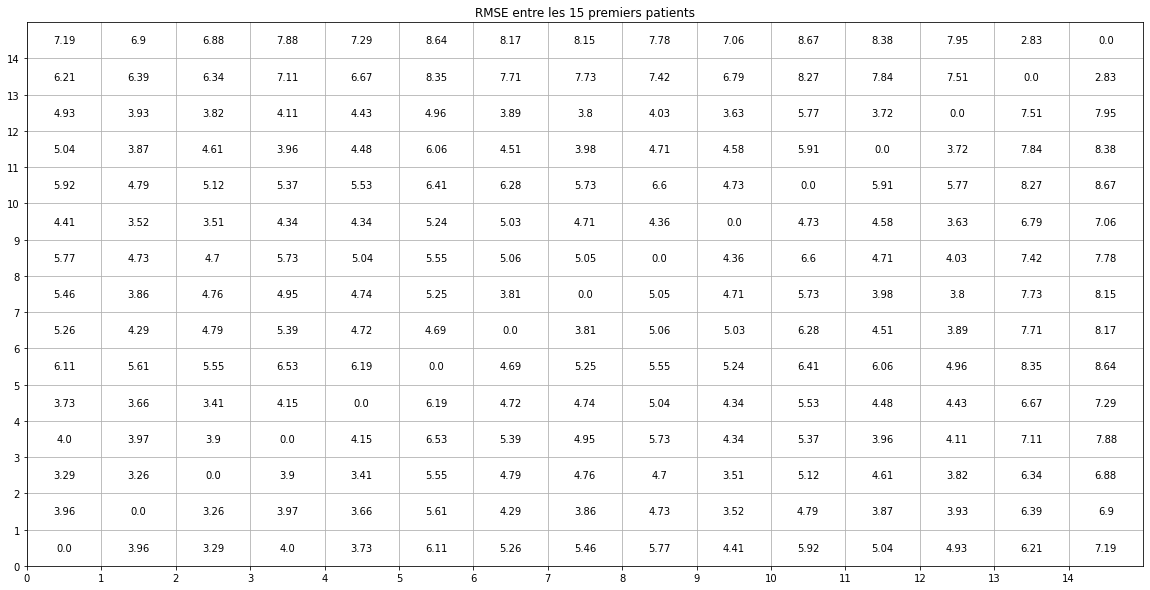

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
min_val, max_val = 0, 15
for i in range(15):
    for j in range(15):
        c = round(np.sqrt(mse(Angles[i,:,:],Angles[j,:,:])),2)
        ax.text(i+0.5, j+0.5, str(c), va='center', ha='center')
ax.set_xlim(min_val, max_val)
ax.set_ylim(min_val, max_val)
ax.title.set_text("RMSE entre les 15 premiers patients")

ax.set_xticks(np.arange(max_val))
ax.set_yticks(np.arange(max_val))
fig.savefig("./RMSE.png")
ax.grid()      

In [ ]:
Angles = np.repeat(Angles,5,axis=1)
print(Angles.shape)

## **1.3 Visualisation des données des patients**


La visualisation des angles d'un seul patient.
np.random.choice choisit un entier au hasard entre 0 et (le nombre totale des patients-1)

In [ ]:
os.mkdir('./angles_patient')

In [ ]:
import matplotlib.pyplot as plt

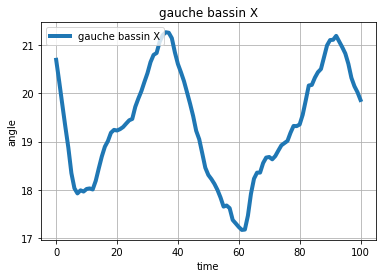

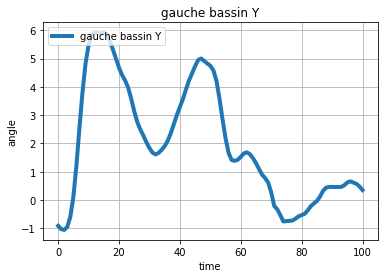

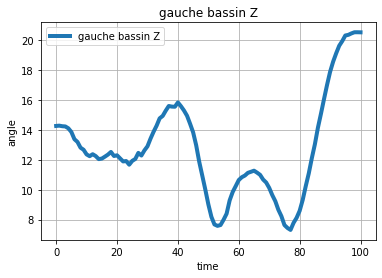

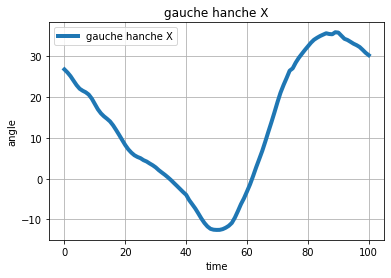

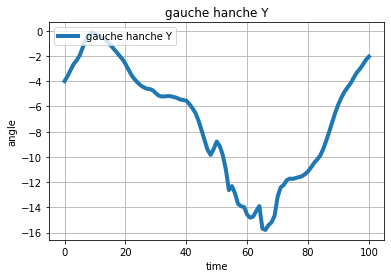

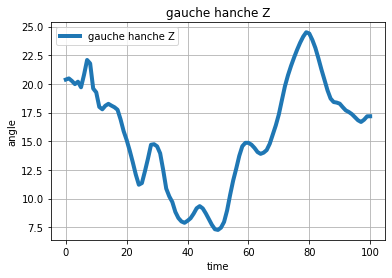

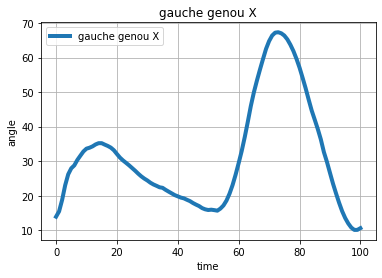

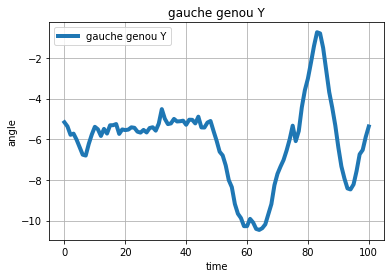

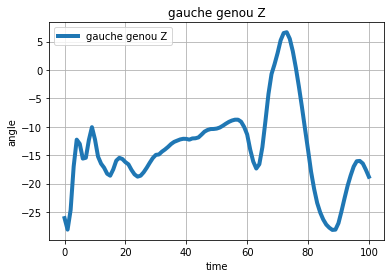

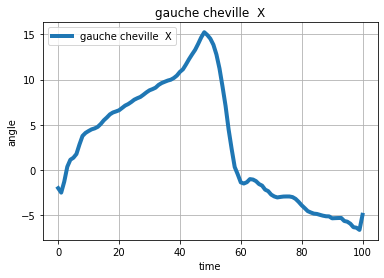

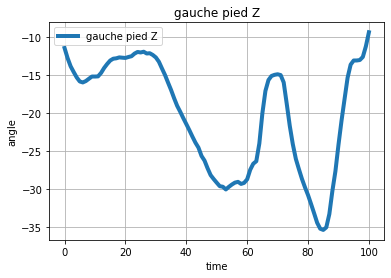

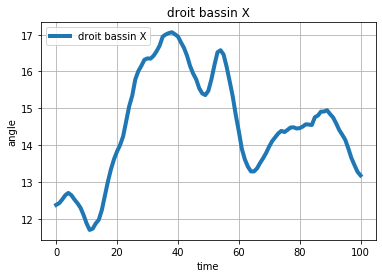

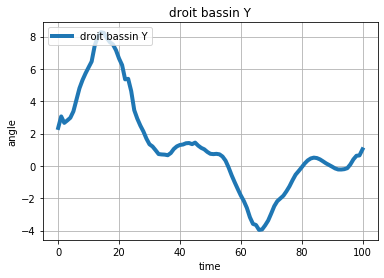

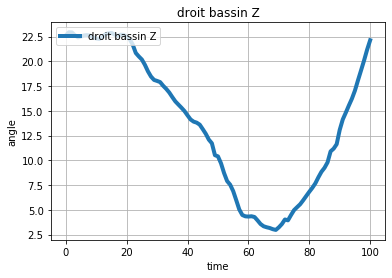

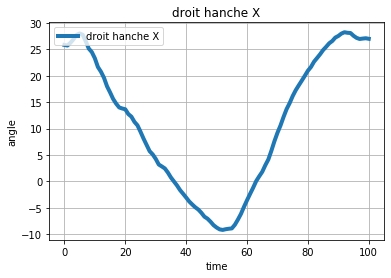

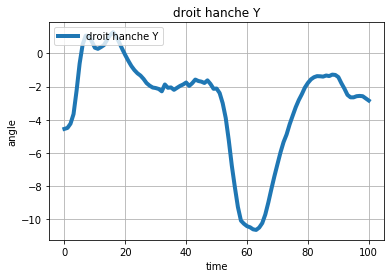

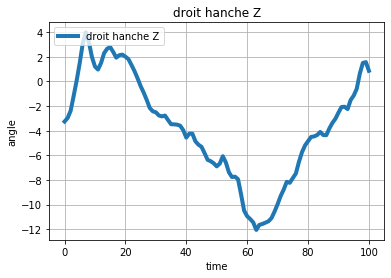

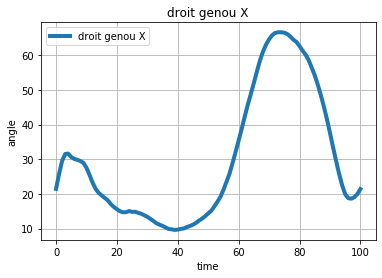

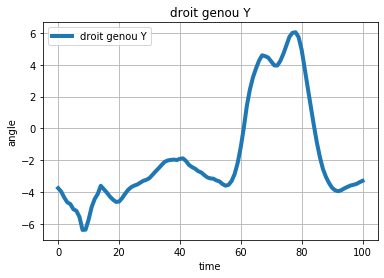

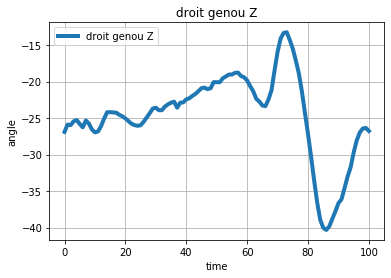

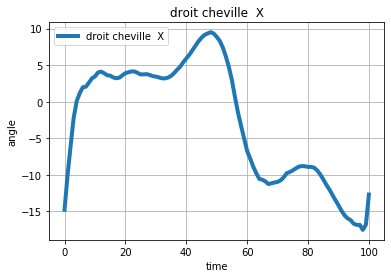

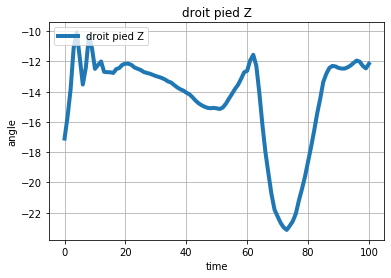

In [ ]:
M=['bassin X','bassin Y','bassin Z',  'hanche X','hanche Y','hanche Z' ,'genou X','genou Y','genou Z', 'cheville  X' ,'pied Z'  ]
A=['gauche','droit']
for i in range (Angles.shape[2]):
  a=''
  if( i<11):
    a=A[0]+' '+M[i]
  else:
    a=A[1]+' '+M[i-11]  
  t = np.arange(101)
  plt.subplot(1, 1, 1)
  v = np.random.choice(Angles.shape[0],1)
  s = Angles[v,t,i]
  lines = plt.plot(t, s)
  plt.setp(lines[0], linewidth=4)


  plt.title(a)
  plt.ylabel('angle')
  plt.xlabel('time')
  plt.legend([a],loc='upper left')
  plt.grid()
  
  plt.savefig('./angles_patient/'+a+'.png')
  plt.show()

## **1.4 La distribution de la moyenne**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


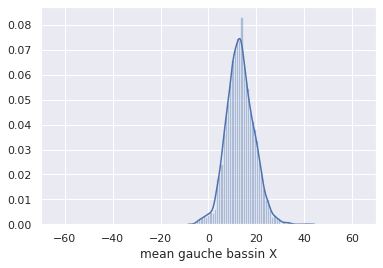

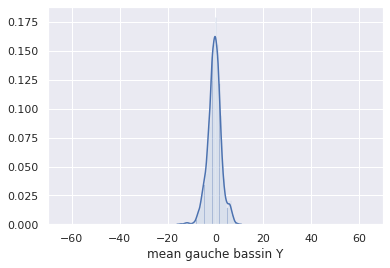

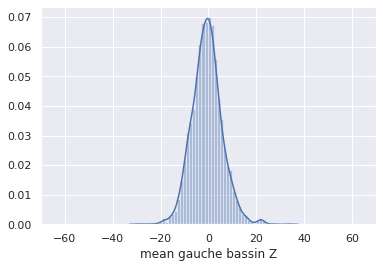

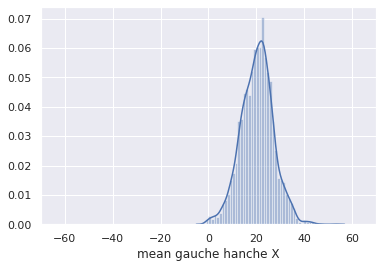

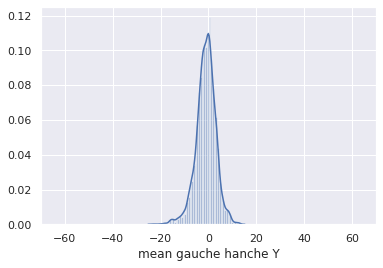

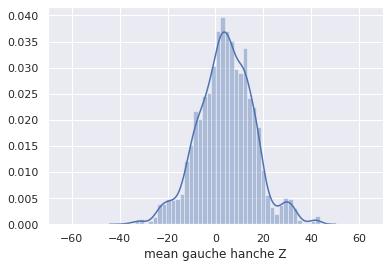

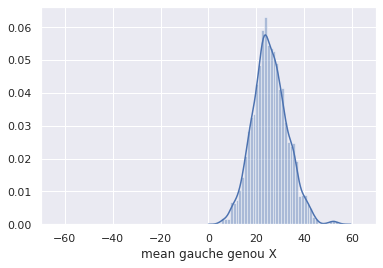

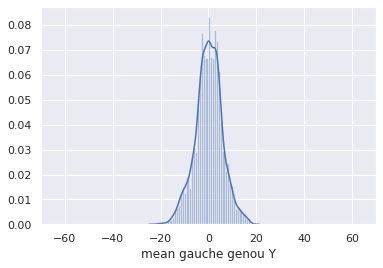

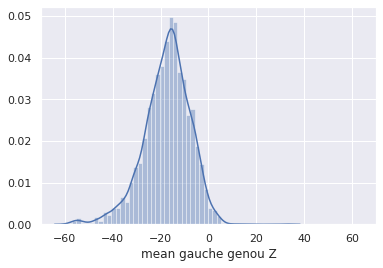

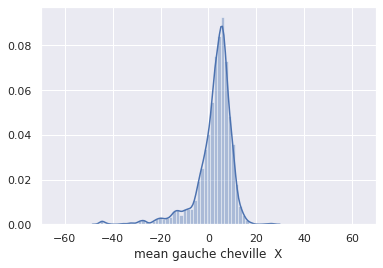

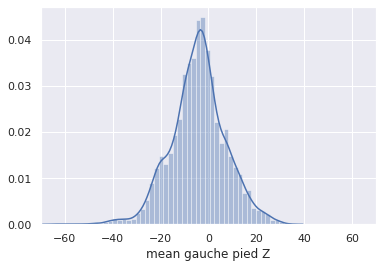

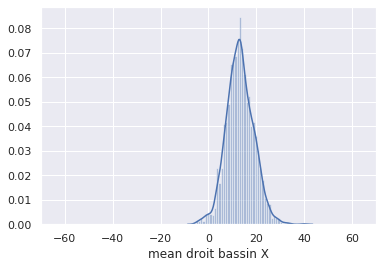

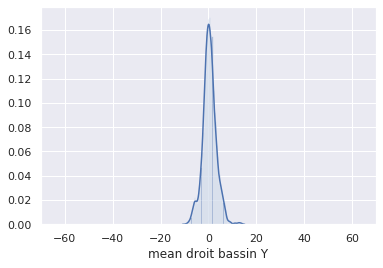

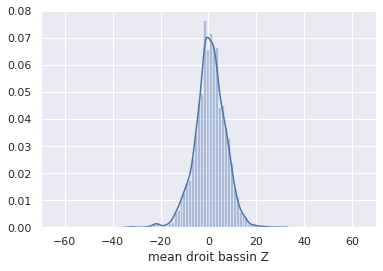

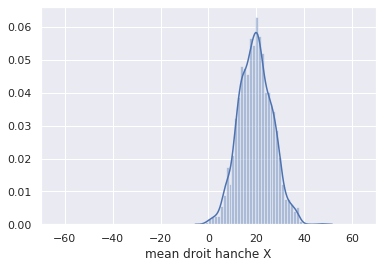

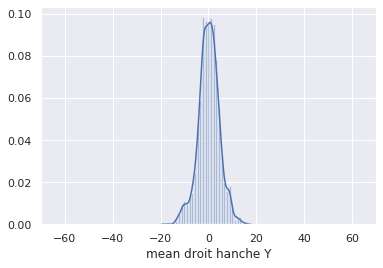

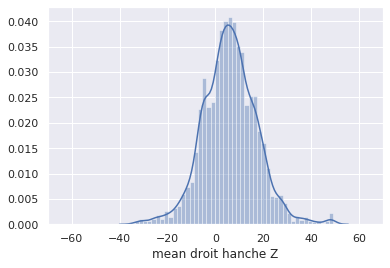

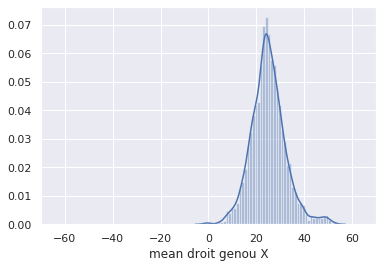

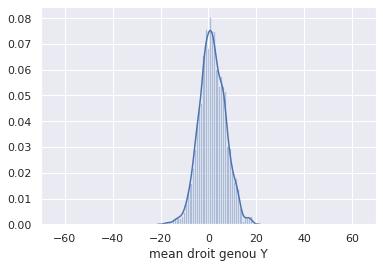

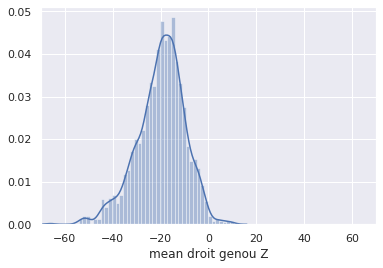

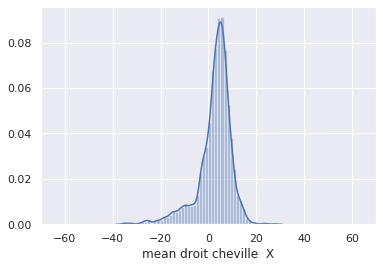

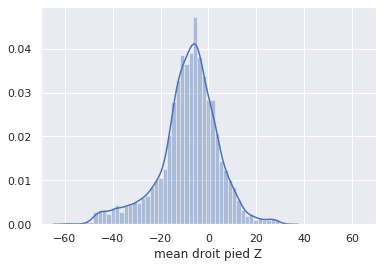

In [ ]:
import seaborn as sns
import pandas as pd

os.mkdir("./mean")
m_c = []

M=['bassin X','bassin Y','bassin Z',  'hanche X','hanche Y','hanche Z' ,'genou X','genou Y','genou Z', 'cheville  X' ,'pied Z'  ]
A=['gauche','droit']
for i in range (Angles.shape[2]):
    a=''
    if( i<11):
      a=A[0]+' '+M[i]
    else:
      a=A[1]+' '+M[i-11]
    mean_all = np.mean(Angles[:,:,i],axis=-1)  
    mean_all = pd.Series(mean_all, name="mean "+a)
    sns.set(); 
    
    plt.figure()
    ax = sns.distplot(mean_all)

    index = list(ax.get_lines()[0].get_data()[1]).index(max(list(ax.get_lines()[0].get_data()[1])))
    m_c.append(ax.get_lines()[0].get_data()[0][index])
    
    plt.xlim(-70, 70)
    ax.figure.savefig("./mean/mean "+a+".png")


## **1.5 La distribution de la variance**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


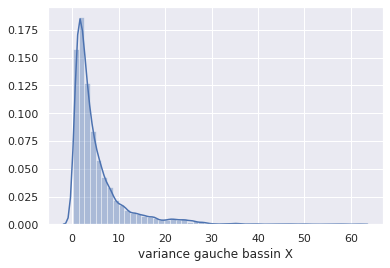

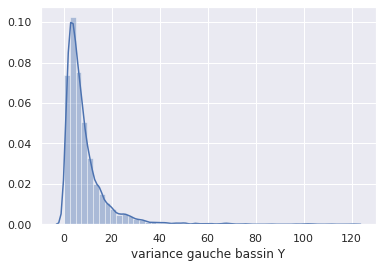

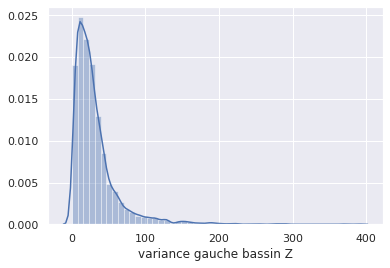

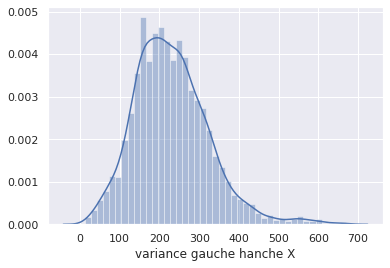

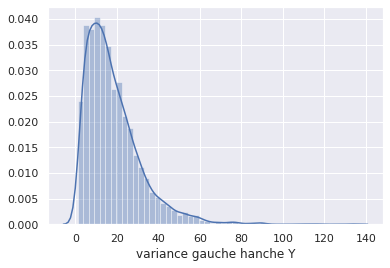

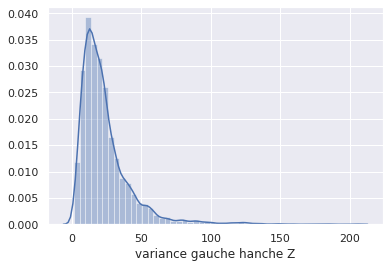

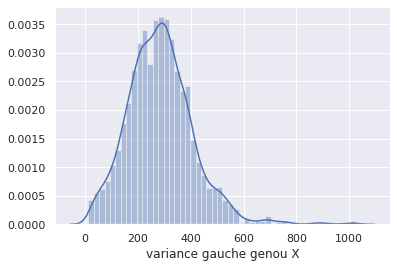

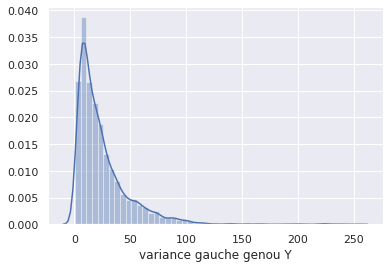

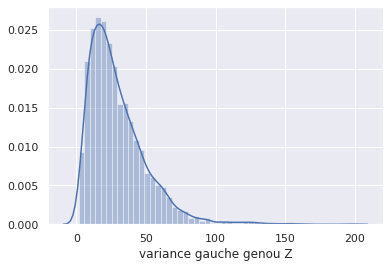

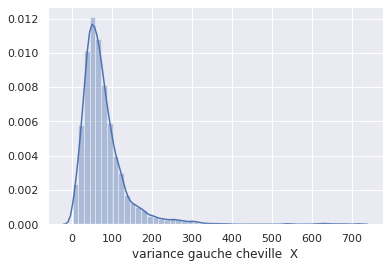

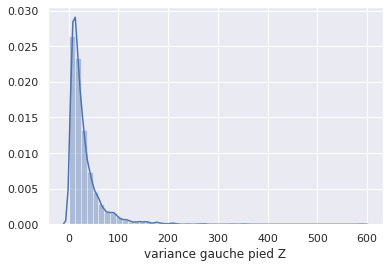

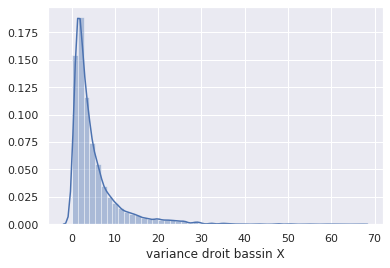

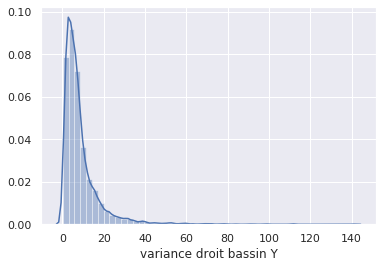

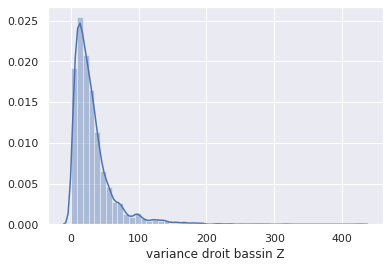

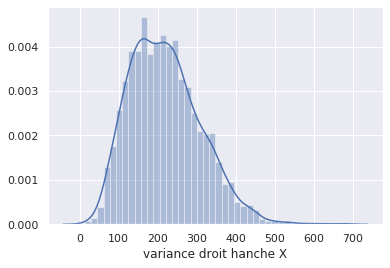

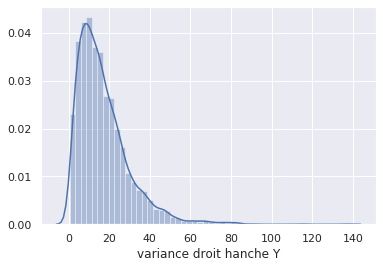

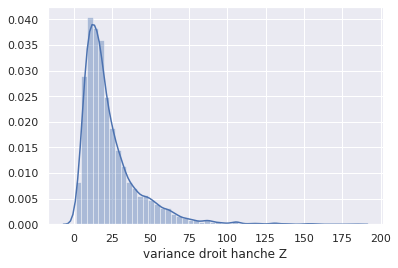

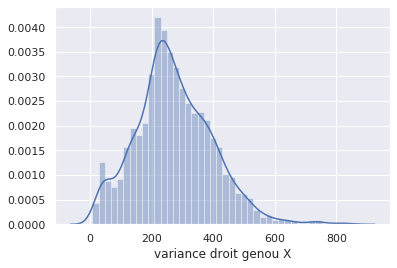

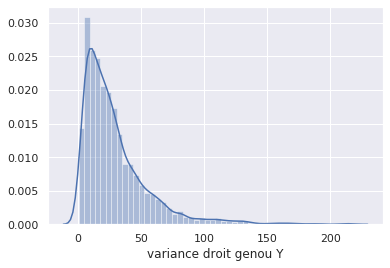

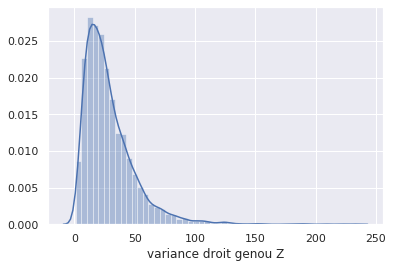

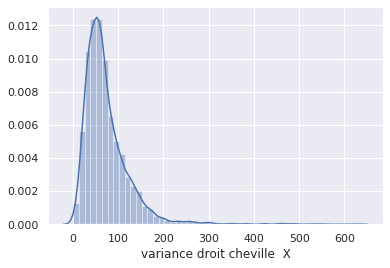

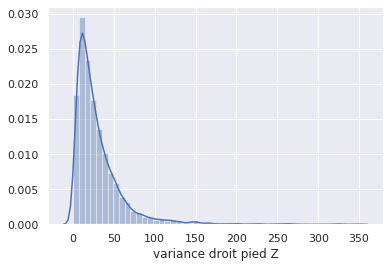

In [ ]:
import seaborn as sns
import pandas as pd

#os.mkdir("./variance")

s_c = []
std_all = np.std(Angles.reshape(Angles.shape[0],-1),axis=-1)
M=['bassin X','bassin Y','bassin Z',  'hanche X','hanche Y','hanche Z' ,'genou X','genou Y','genou Z', 'cheville  X' ,'pied Z'  ]
A=['gauche','droit']
for i in range (Angles.shape[2]):
    a=''
    if( i<11):
      a=A[0]+' '+M[i]
    else:
      a=A[1]+' '+M[i-11]
    var_all = np.var(Angles[:,:,i],axis=-1)  
    var_all = pd.Series(var_all, name="variance "+a)
    
    sns.set() 
    
    plt.figure()
    ax = sns.distplot(var_all)

    index = list(ax.get_lines()[0].get_data()[1]).index(max(list(ax.get_lines()[0].get_data()[1])))
    s_c.append(ax.get_lines()[0].get_data()[0][index])
    
    #plt.xlim(-5, 30)
    ax.figure.savefig("./variance/variance "+a+".png")

## **1.6 Filtrage**

### **1.6.1  par rapport à la variance**

In [ ]:
Data = []
v = np.std(Angles[:,:,:],axis=1)  
for i in range(v.shape[0]):
  if 1<v[i,0]<2.1 and 1<v[i,1]<3 and 2.5<v[i,2]<6.25 and 12<v[i,3]<17.5 and 2.8<v[i,4]<5 and 2.5<v[i,5]<5 and 14<v[i,6]<19.9 and 2<v[i,7]<5.1 and 3<v[i,8]<6.2 and 6<v[i,9]<8.5 and 2.5<v[i,10]<6:
    Data.append(Angles[i,:,:])
print(len(Data))    

37


In [ ]:
Data = np.array(Data)
print(Data.shape)

(37, 101, 22)


### **1.6.2  par rapport à la moyenne**

In [ ]:
Data = []
v = np.mean(Angles[:,:,:],axis=1)  
for i in range(v.shape[0]):
  if 8<v[i,0]<16.5 and -2.5<v[i,1]<2.5 and -5<v[i,2]<5 and 15<v[i,3]<26 and -4<v[i,4]<2.5 and -4<v[i,5]<12 and 20<v[i,6]<30 and -5<v[i,7]<5 and -24<v[i,8]<-15 and 3<v[i,9]<8 and -15<v[i,10]<2:
    Data.append(Angles[i,:,:])
print(len(Data)) 

20


In [ ]:
Data = np.array(Data)
print(Data.shape)

(20, 101, 22)


## **1.7 Data+bruit(centralisé)**

In [ ]:
m = np.mean(Angles[:,:,:],axis=1) 
#s = np.std(Angles[:,:,:],axis=1) 

m_c_0 = np.asarray(m_c)

s_c_0 = np.repeat(np.asarray(s_c).reshape(1,22),22,axis=0)



Angles_c = np.multiply(np.repeat(np.divide(1,s).reshape(3823,1,22),101,axis=1),Angles)+np.random.multivariate_normal(np.zeros((22)),s_c_0,size=(3823,101))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: covariance is not positive-semidefinite.
  # Remove the CWD from sys.path while we load stuff.


Visualisation d'un patient et un patient bruité

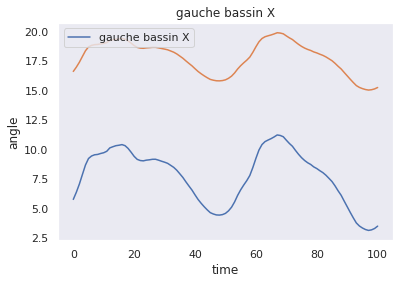

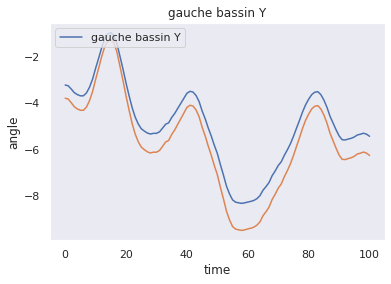

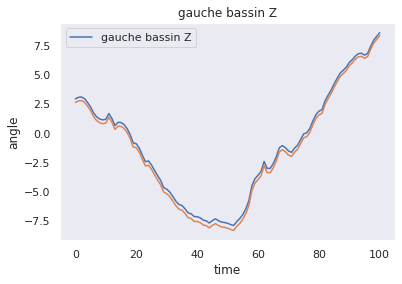

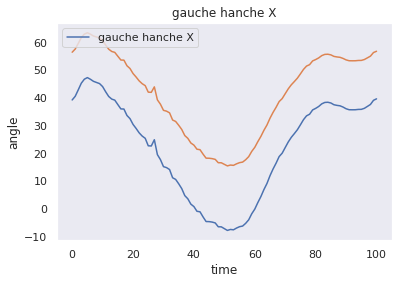

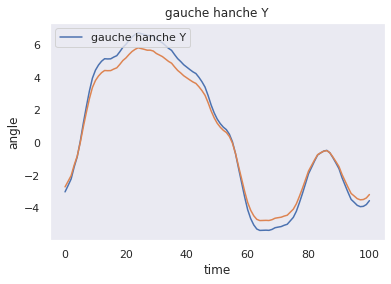

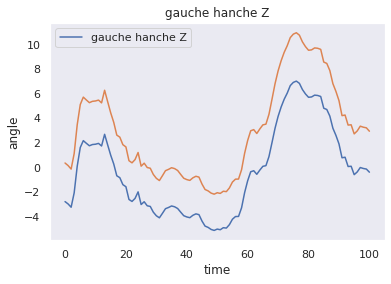

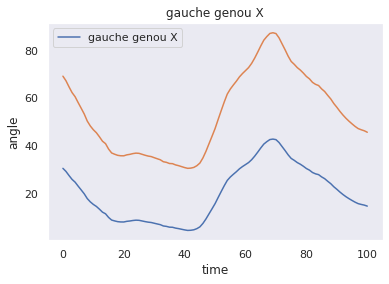

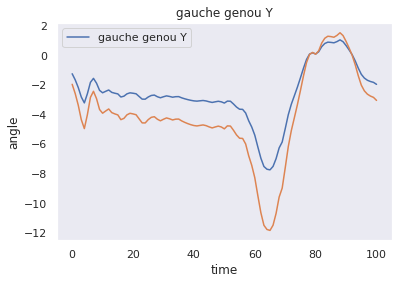

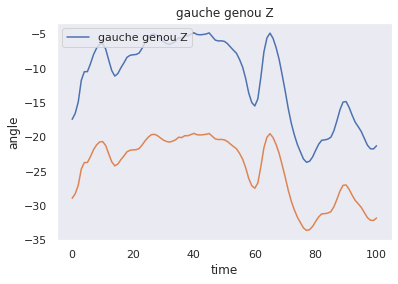

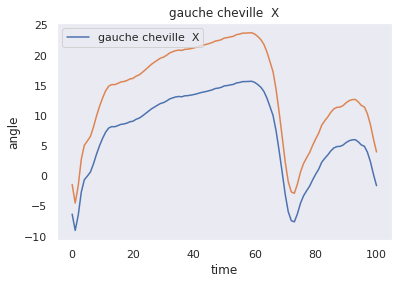

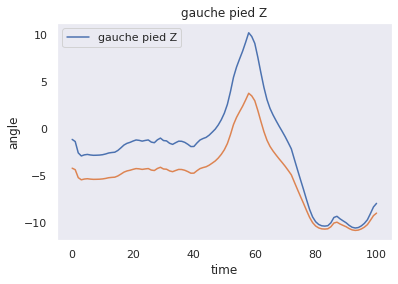

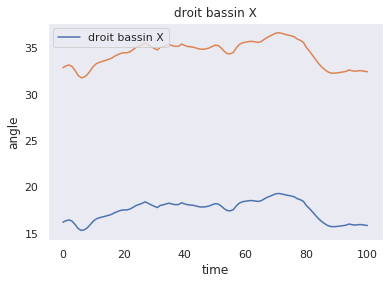

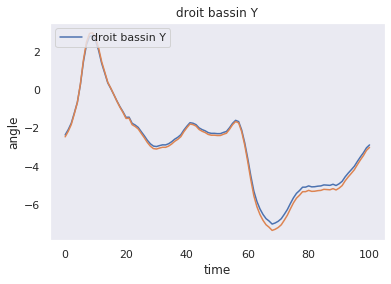

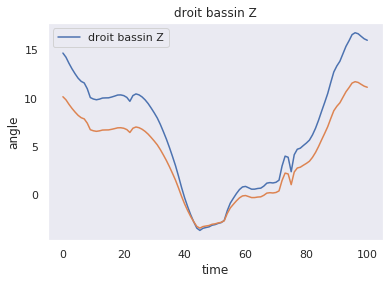

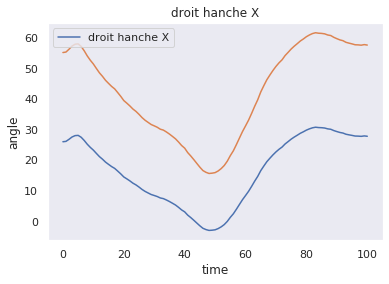

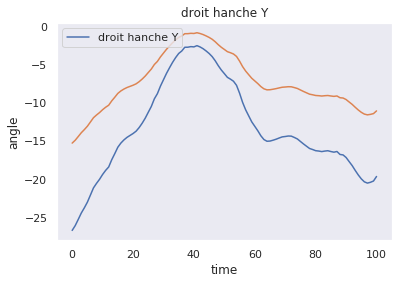

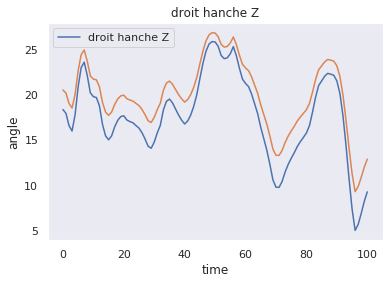

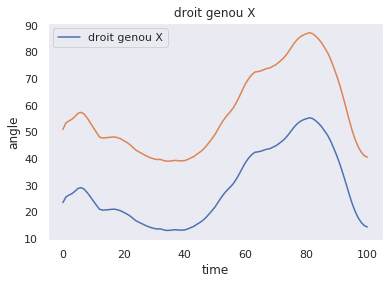

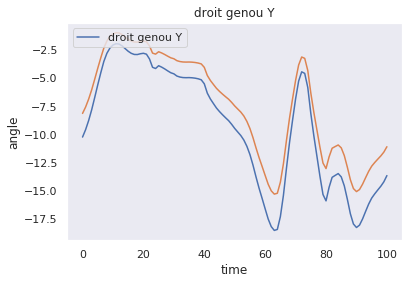

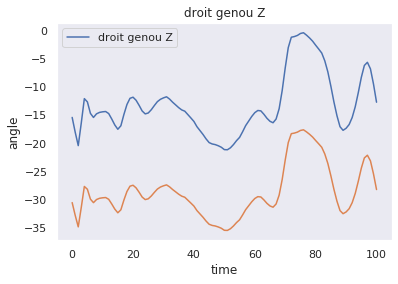

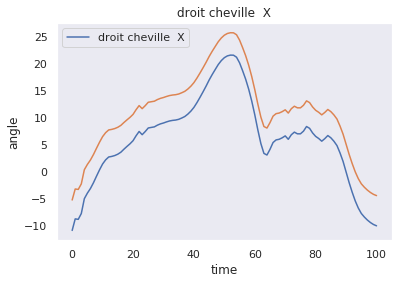

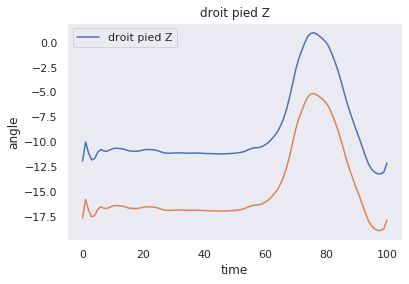

In [ ]:
import matplotlib.pyplot as plt


M=['bassin X','bassin Y','bassin Z',  'hanche X','hanche Y','hanche Z' ,'genou X','genou Y','genou Z', 'cheville  X' ,'pied Z'  ]
A=['gauche','droit']
for i in range (Angles.shape[2]):
  a=''
  if( i<11):
    a=A[0]+' '+M[i]
  else:
    a=A[1]+' '+M[i-11]  
  t = np.arange(101)
  plt.subplot(1, 1, 1)
  v = np.random.choice(Angles.shape[0],1)
  s = Angles[v,t,i]
  plt.plot(t, s)
  h = Angles_c[v,t,i]
  plt.plot(t,h)

  plt.title(a)
  plt.ylabel('angle')
  plt.xlabel('time')
  plt.legend([a],loc='upper left')
  plt.grid()
  
  plt.show()

# **2. GAN**

## **2.1 Fit loss binaray-crossentropy**

Model/Loss/Accuracy/Checkpoint/training

In [ ]:
buffer_size,times_step,input_dimension=Angles.shape

batch_size=256

Angles=tf.convert_to_tensor(Angles,dtype=tf.float32)

epochs = 100
dataset=tf.data.Dataset.from_tensor_slices(Angles).shuffle(buffer_size).batch(batch_size)

In [ ]:
opt_gen = tf.keras.optimizers.Adam(1e-1,0.5)
opt_dis = tf.keras.optimizers.Adam(1e-1,0.5)
opt_gan = tf.keras.optimizers.Adam(1e-1,0.5)

### **2.1.1 Générateur**

In [ ]:
def generateur(architecture,i):
    model = tf.keras.Sequential()
    init = tf.random_normal_initializer(0., 0.02)
    
    if (architecture=="LSTM") :
        
        
        model.add(layers.Dense(2**(i)*times_step,input_shape=(10,)))
        model.add(layers.Reshape((times_step,2**i)))
        model.add(layers.Bidirectional(layers.LSTM(2**(i),activation='tanh',return_sequences=True, recurrent_activation='sigmoid')))
        model.add(layers.Dropout(0.5))
        model.add(layers.Bidirectional(layers.LSTM(2**(i),activation='tanh',return_sequences=True, recurrent_activation='sigmoid')))
        model.add(layers.Dropout(0.5))
        model.add(layers.Bidirectional(layers.LSTM(2**(i),activation='tanh',return_sequences=True, recurrent_activation='sigmoid')))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(input_dimension, activation='tanh'))
        
        
        
    elif (architecture=='CNN')  :
      model.add(layers.Dense(128*7*7, input_shape=(10,)))
      model.add(layers.LeakyReLU(alpha=0.2))
      model.add(layers.Reshape((7, 7, 128)))
      # upsample to 14x14
      model.add(layers.Conv2DTranspose(128, (4,4), strides=(2,2), padding='same',kernel_initializer=init))
      model.add(layers.BatchNormalization())
      model.add(layers.LeakyReLU(alpha=0.2))
      # upsample to 28x28
      model.add(layers.Conv2DTranspose(128, (4,4), strides=(2,2), padding='same',kernel_initializer=init))
      model.add(layers.BatchNormalization())
      model.add(layers.LeakyReLU(alpha=0.2))
      # output 28x28x1
      model.add(layers.Conv2D(1, (2,2), activation='tanh', padding='same',kernel_initializer=init))
      model.add(layers.Flatten())
      model.add(layers.Dense(101*22))
      model.add(layers.Reshape((101,22)))
    model.compile(loss='binary_crossentropy',optimizer=opt_gen)

    return model

### **2.1.2 Discriminateur**

In [ ]:
def discriminateur(architecture,i):
    model = tf.keras.Sequential()
    init = tf.random_normal_initializer(0., 0.02)
    if (architecture=="LSTM") :

      model.add(layers.Bidirectional(layers.LSTM(2**i,activation='tanh',return_sequences=True, recurrent_activation='sigmoid',kernel_initializer='glorot_normal'),input_shape=(times_step,input_dimension)))
      model.add(layers.Dropout(0.5))
      model.add(layers.Bidirectional(layers.LSTM(2**i,activation='tanh',return_sequences=True, recurrent_activation='sigmoid')))
      model.add(layers.Dropout(0.5))
      model.add(layers.Bidirectional(layers.LSTM(2**i,activation='tanh',return_sequences=True, recurrent_activation='sigmoid')))
      model.add(layers.Dropout(0.5))
      model.add(layers.Flatten())
      model.add(layers.Dense(1, activation='sigmoid'))
      
      
    elif (architecture=='CNN')  :
       model.add(layers.Flatten(input_shape=(times_step,input_dimension)))
       model.add(layers.Dense(7*7*2**(i), use_bias=False))
       
       model.add(layers.Reshape((7, 7, 2**i)))
       model.add(layers.Conv2D(64, (100, 100), strides=(5, 5), padding='same',kernel_initializer=init))
       model.add(layers.BatchNormalization())
       model.add(layers.LeakyReLU(alpha=0.2))
       model.add(layers.Dropout(0.25))
       #model.add(layers.Dropout(0.5))
       model.add(layers.ZeroPadding2D(padding=((0,1),(0,1))))
       model.add(layers.LeakyReLU(alpha=0.2))
       model.add(layers.Dropout(0.25)) 
       model.add(layers.Conv2D(128, (100, 100), strides=(5, 5), padding='same',kernel_initializer=init))
       model.add(layers.BatchNormalization())
       model.add(layers.LeakyReLU(alpha=0.2))
       model.add(layers.Dropout(0.25))
       model.add(layers.Conv2D(1, (22,22), activation='tanh', padding='same',kernel_initializer=init))
       model.add(layers.BatchNormalization())
       model.add(layers.LeakyReLU(alpha=0.2))
       model.add(layers.Dropout(0.25))
       model.add(layers.Flatten())
       model.add(layers.Dense(1, activation='sigmoid'))
     
    model.compile(loss='binary_crossentropy',optimizer=opt_dis,metrics=['accuracy']) 
    return model


### **2.1.3 GAN**

In [ ]:
def gan(generateur,discriminateur):

    discriminateur.trainable = False  ## On arrete l'entrainement du discriminateur
    model = tf.keras.Sequential()
    model.add(generateur)
    model.add(discriminateur)
    
    model.compile(loss='binary_crossentropy',optimizer=opt_gan)
    return model

### **2.1.4 Construction des graphes des modèles**

In [ ]:
generator=generateur("LSTM",3)
discriminator=discriminateur("LSTM",1)
gan_1=gan(generator,discriminator)

In [ ]:
generator.build((times_step,input_dimension))
generator.summary()
discriminator.build((times_step,input_dimension))
discriminator.summary()
gan_1.summary()

### **2.1.5 Checkpoint**

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=opt_gen,discriminator_optimizer=opt_dis,generator=generator,discriminator=discriminator)                                

### **2.1.6 Entrainement**

In [ ]:
noise_dim = 10
num_examples_to_generate = 1
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [ ]:
loss_real=[]
loss_fake=[]
loss_gan=[]
acc_real=[]
acc_fake=[]

In [ ]:
for epoch in range(epochs):
        start = time.time()
        for Angles_batch in dataset:
                noise = tf.random.normal([batch_size,noise_dim])

                generated_Angles = generator(noise, training=True)
                
                
                history_real = discriminator.fit(Angles_batch,np.ones(Angles_batch.shape[0]),epochs=1)
                history_fake = discriminator.fit(generated_Angles,np.zeros(generated_Angles.shape[0]),epochs=1)
                noise2  = tf.random.normal([batch_size,noise_dim])
                
                
                history_gan = gan_1.fit(noise2,np.ones(noise2.shape[0]),epochs=1) 
                
                       
        if (epoch + 1) % 15 == 0:
              checkpoint.save(file_prefix = checkpoint_prefix)
        print("epoch"+str(epoch))
        acc_fake.append(history_fake.history['accuracy'])
        acc_real.append(history_real.history['accuracy'])

        loss_real.append(history_real.history['loss'])
        loss_fake.append(history_fake.history['loss'])
        loss_gan.append(history_gan.history['loss'])
    
    

Train on 256 samples
256/256 [==============================] - 2s 9ms/sample - loss: 0.7010 - accuracy: 0.4961
Train on 256 samples
256/256 [==============================] - 0s 800us/sample - loss: 0.6934 - accuracy: 0.5273
Train on 256 samples
256/256 [==============================] - 13s 50ms/sample - loss: 0.6434
Train on 256 samples
256/256 [==============================] - 0s 776us/sample - loss: 0.6888 - accuracy: 0.5195
Train on 256 samples
256/256 [==============================] - 0s 782us/sample - loss: 0.8243 - accuracy: 0.2422
Train on 256 samples
256/256 [==============================] - 1s 5ms/sample - loss: 0.5764
Train on 256 samples
256/256 [==============================] - 0s 755us/sample - loss: 0.7033 - accuracy: 0.4883
Train on 256 samples
256/256 [==============================] - 0s 743us/sample - loss: 0.8972 - accuracy: 0.0898
Train on 256 samples
256/256 [==============================] - 1s 6ms/sample - loss: 0.5561
Train on 256 samples
256/256 [=======

### **2.1.7 Visualisation des courbes d'accuracy du discriminateur et les fonctions de cout** 

In [ ]:
import matplotlib.pyplot as plt

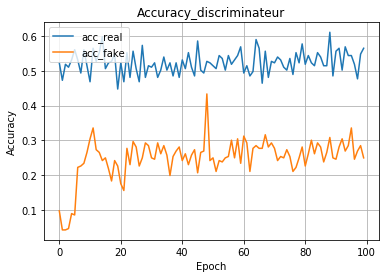

In [ ]:

plt.plot(acc_real)

plt.plot(acc_fake)

plt.title('Accuracy_discriminateur')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['acc_real', 'acc_fake'], loc='upper left')
plt.grid()
plt.savefig('./accuracy.png')
plt.show()



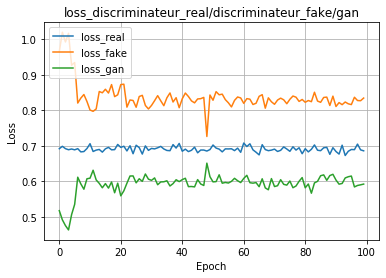

In [ ]:
plt.plot(loss_real)
plt.plot(loss_fake)
plt.plot(loss_gan)
plt.title('loss_discriminateur_real/discriminateur_fake/gan')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss_real', 'loss_fake','loss_gan'], loc='upper left')
plt.grid()
plt.savefig('./loss.png')
plt.show()

### **2.1.8 Visualisation des données simulées**


In [ ]:
os.mkdir('./images')

In [ ]:
seed = tf.random.normal([1, 10])
generated = generator(seed ,training=False).numpy()

In [ ]:
print(seed)

tf.Tensor(
[[ 0.19948743 -1.6694052  -1.0923184  -0.91087294  0.9658094  -0.34023088
   1.3108425  -0.9676971  -0.78635406  0.48027655]], shape=(1, 10), dtype=float32)


In [ ]:
print(gan_1(seed))

tf.Tensor([[0.5720268]], shape=(1, 1), dtype=float32)


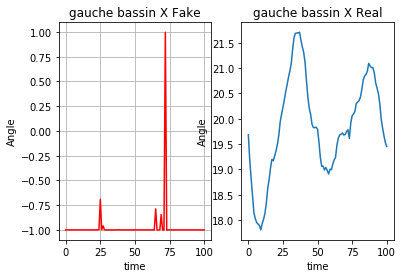

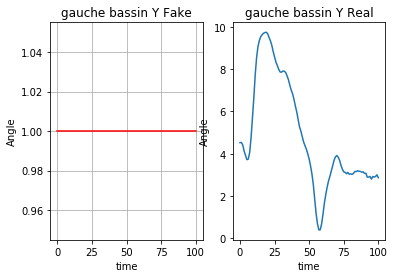

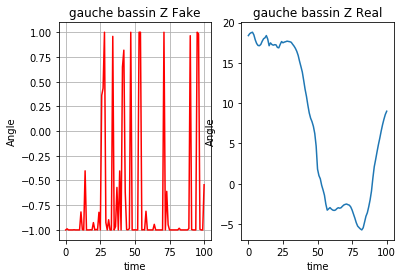

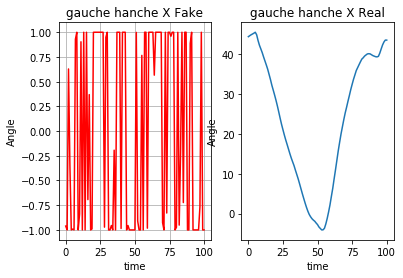

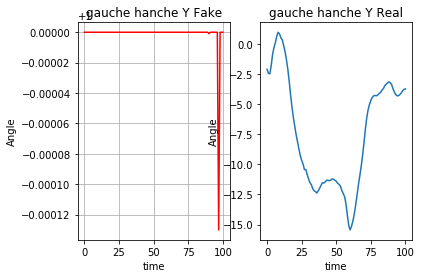

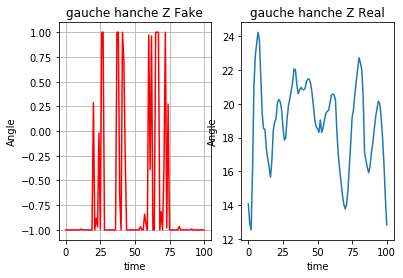

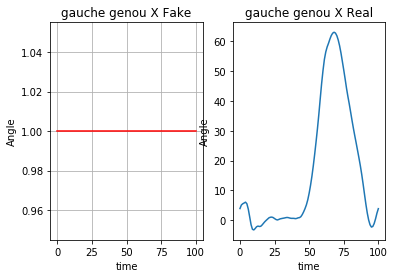

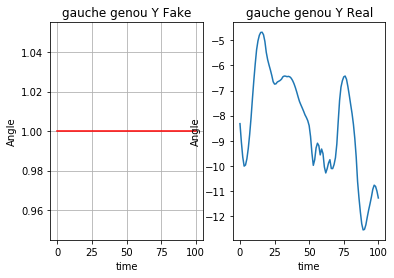

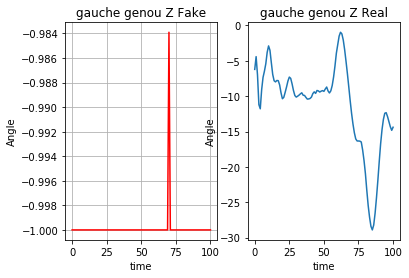

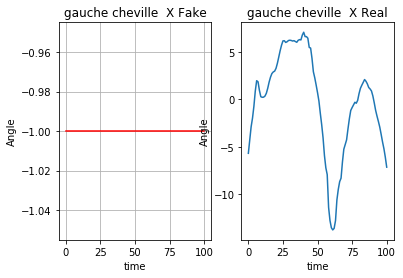

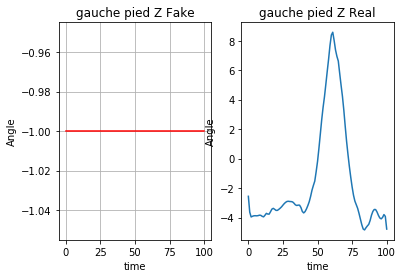

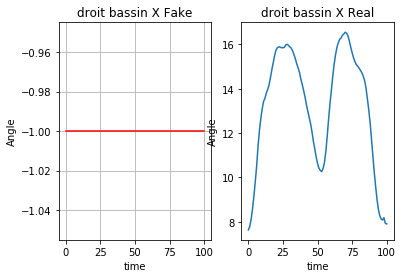

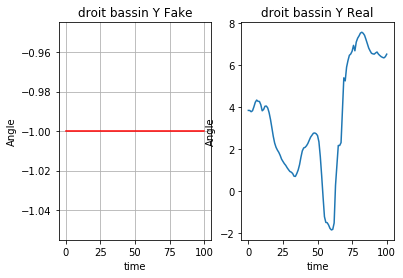

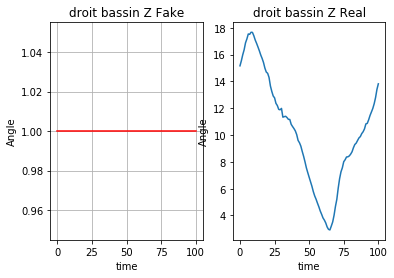

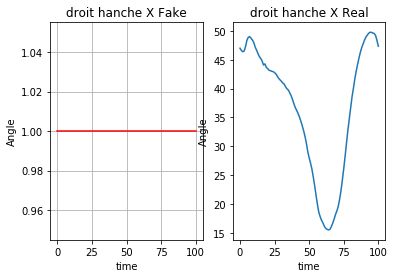

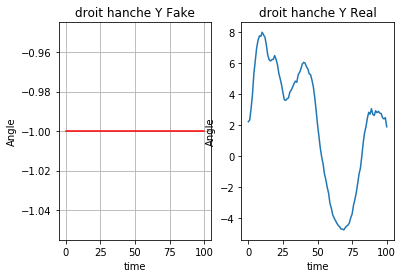

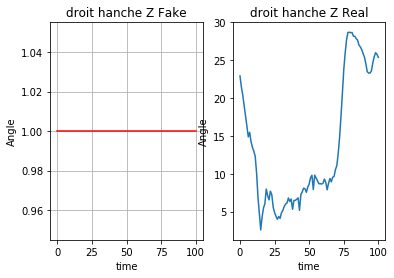

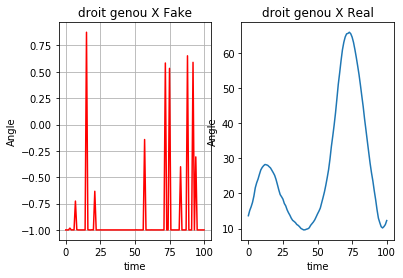

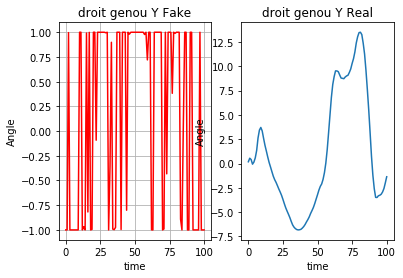

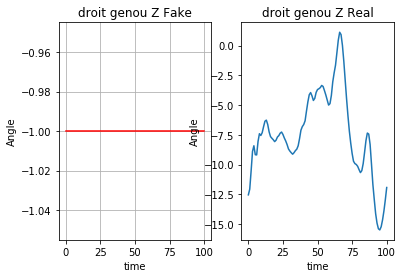

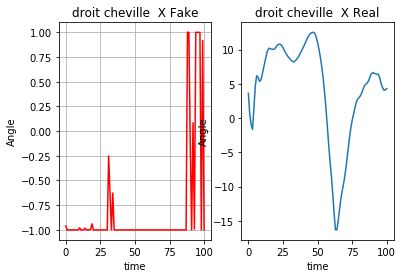

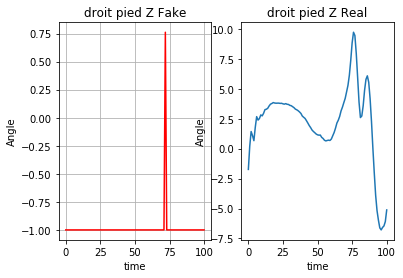

In [ ]:
with np.load('Data.npz') as data:  
    Angles= data['Input']
    
M=['bassin X','bassin Y','bassin Z',  'hanche X','hanche Y','hanche Z' ,'genou X','genou Y','genou Z', 'cheville  X' ,'pied Z'  ]
A=['gauche','droit']
m=1
for i in range (Angles.shape[2]):
    a=''
    if( i<11):
      a=A[0]+' '+M[i]
    else:
      a=A[1]+' '+M[i-11]  
    t = np.arange(101)
    h = np.random.choice(Angles.shape[0],1)
    s = Angles[h,t,i]
    v = generated[0,t,i]
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(t,v,color='red')
    ax2.plot(t, s)
    ax1.set_xlabel('time')
    ax1.set_ylabel('Angle')
    ax2.set_xlabel('time')
    ax2.set_ylabel('Angle') 
    ax1.set_title(a+' Fake')  
    ax2.set_title(a+' Real')   
    plt.savefig('./images/'+str(m)+'.png')
        
    m+=1

    
    ax1.grid()
    
    
    plt.show()

### **2.1.9 Analyse des résultats**

#### **2.1.9.1 Mean Square Error**

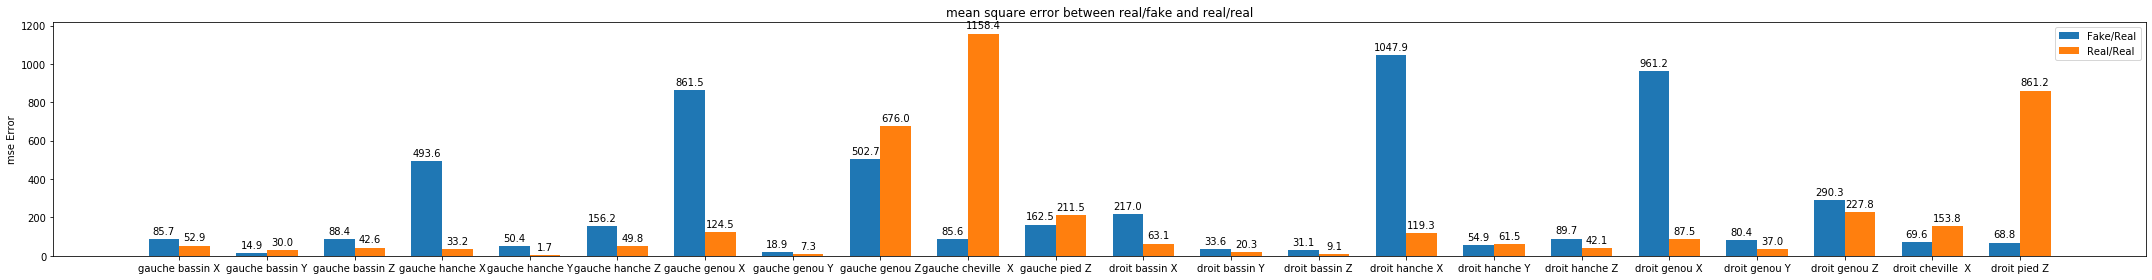

In [ ]:
mean_square_error_fake_real =[]
mean_square_error_real_real =[]
for i in range(Angles.shape[2]):
   v = np.random.choice(Angles.shape[0],1)
   seed = tf.random.normal([1, 10])
   generated = generator(seed ,training=False).numpy()[0,:,i]
   mean_square_error_fake_real.append(np.around(np.mean((Angles[v,:,i]-generated)**2),decimals=1)) 
   h = np.random.choice(Angles.shape[0],1)
   j = np.random.choice(Angles.shape[0],1)
   mean_square_error_real_real.append(np.around(np.mean((Angles[j,:,i]-Angles[h,:,i])**2),decimals=1))

np.set_printoptions(precision=3)
M=['bassin X','bassin Y','bassin Z',  'hanche X','hanche Y','hanche Z' ,'genou X','genou Y','genou Z', 'cheville  X' ,'pied Z'  ]
A=['gauche','droit']
L=[]

for i in range (Angles.shape[2]):
    a=''
    if( i<11):
      a=A[0]+' '+M[i]
    else:
      a=A[1]+' '+M[i-11]
    L.append(a)

x = np.arange(len(L))  
width = 0.35  

fig, ax = plt.subplots(figsize=(30, 4))
rects1 = ax.bar(x - width/2, mean_square_error_fake_real, width,label='Fake/Real')
rects2 = ax.bar(x + width/2, mean_square_error_real_real, width, label='Real/Real')



ax.set_ylabel('mse Error')
ax.set_title('mean square error between real/fake and real/real')
ax.set_xticks(x)
ax.set_xticklabels(L)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.savefig('./mean_square_error.png')
plt.show()



#### **2.1.9.2 Taux d'erreur**

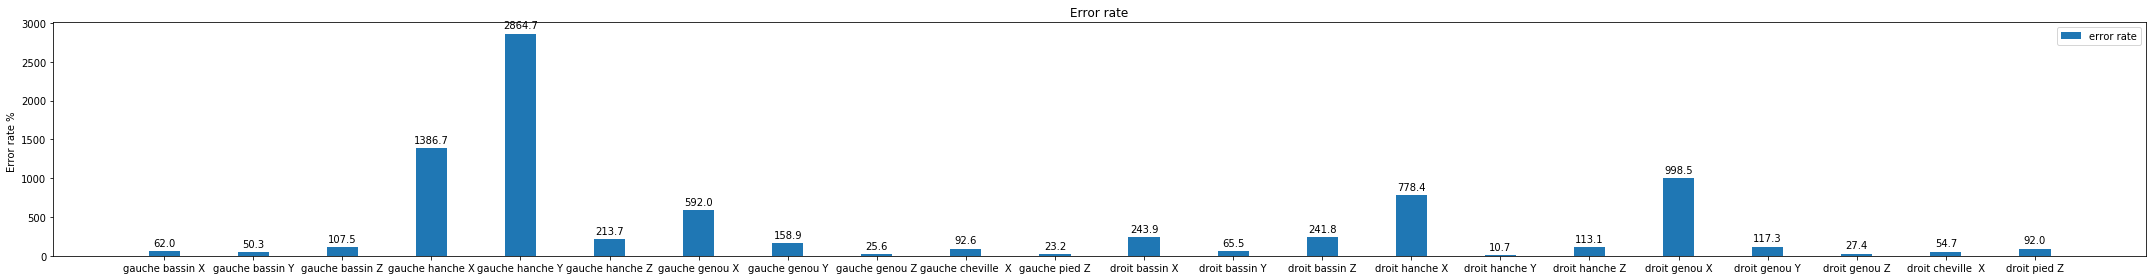

In [ ]:
error_rate=np.around(100*np.divide(abs(np.array(mean_square_error_fake_real)-np.array(mean_square_error_real_real)),np.array(mean_square_error_real_real)),decimals=1)
fig, ax = plt.subplots(figsize=(30, 4))
rects1 = ax.bar(x , error_rate, width,label='error rate')

ax.set_ylabel('Error rate % ')
ax.set_title('Error rate')
ax.set_xticks(x)
ax.set_xticklabels(L)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)


fig.tight_layout()
plt.savefig('./error_rate.png')
plt.show()

## **2.2 Une seule fonction de cout  GAN(Minimax) / WGAN(Wasserstein Loss)**

La particularité dans ces deux fonctions c'est que la fonction de cout du discriminateur dépend de la fonction de cout du générateur.

Bibliographie: 

1.   GAN : https://developers.google.com/machine-learning/gan/loss
2.   WGAN : https://lilianweng.github.io/lil-log/2017/08/20/from-GAN-to-WGAN.html


    



**Minimax loss:**

minima_loss = Ex[log(D(x)]+Ez[log(1-D(G(z))]

Generateur minimise la fonction Cout. => Gradient descent

Discriminateur maximise la fonction Cout. => Gradient ascent

**Wasserstein Loss:**

Critic_loss = D(x)- D(G(z))

Generateur maximise la fonction D(G(z)).

Discriminateur maximise la fonction Critic_loss.

In [ ]:
buffer_size,times_step,input_dimension=Angles.shape

loss_history = []
accuracy = []
generated_angles=[]

batch_size=256

Angles=tf.convert_to_tensor(Angles,dtype=tf.float32)

epochs = 100
dataset=tf.data.Dataset.from_tensor_slices(Angles).shuffle(buffer_size).batch(batch_size)

Pour le filtrage

In [ ]:
Angles=tf.convert_to_tensor(Data,dtype=tf.float32)

loss_history = []
accuracy = []
generated_angles=[]

epochs = 100
times_step,input_dimension = 101,22
batch_size=10
buffer_size=20

dataset=tf.data.Dataset.from_tensor_slices(Angles).shuffle(buffer_size).batch(batch_size)

### **2.2.1 Générateur**

In [ ]:
def generateur(architecture,i):
    model = tf.keras.Sequential(name='Generateur')
    init = tf.random_normal_initializer(0., 0.02)
    
    if (architecture=="LSTM") :
        
        
        model.add(layers.Dense(2**(i)*times_step,input_shape=(10,)))
        model.add(layers.Reshape((times_step,2**i)))
        model.add(layers.Bidirectional(layers.LSTM(2**(i),activation='tanh',return_sequences=True, recurrent_activation='sigmoid')))
        #model.add(layers.Dropout(0.5))
        model.add(layers.Bidirectional(layers.LSTM(2**(i),activation='tanh',return_sequences=True, recurrent_activation='sigmoid')))
        #model.add(layers.Dropout(0.5))
        model.add(layers.Bidirectional(layers.LSTM(2**(i),activation='tanh',return_sequences=True, recurrent_activation='sigmoid')))
        #model.add(layers.Dropout(0.5))
        model.add(layers.Dense(2**i, activation='tanh'))
        model.add(layers.Dense(input_dimension, activation='tanh'))
    elif (architecture=='CNN')  :
          model.add(layers.Dense(101*22, input_shape=(10,)))
          model.add(layers.Reshape((101, 22, 1)))
          # upsample to 14x14
          model.add(layers.Conv2DTranspose(128, (4,4), strides=(2,2), padding='same',kernel_initializer=init))
          model.add(layers.BatchNormalization())
          model.add(layers.LeakyReLU(alpha=0.2))
          # upsample to 28x28
          model.add(layers.Conv2DTranspose(64, (4,4), strides=(2,2), padding='same',kernel_initializer=init))
          model.add(layers.BatchNormalization())
          model.add(layers.LeakyReLU(alpha=0.2))
          model.add(layers.MaxPooling2D((4, 4)))
          model.add(layers.Conv2DTranspose(32, (1,1), strides=(1,1), padding='same',kernel_initializer=init))
          model.add(layers.BatchNormalization())
          model.add(layers.LeakyReLU(alpha=0.2))
          # output 28x28x1
          model.add(layers.Conv2D(1, (2,2), activation='tanh', padding='same',kernel_initializer=init))
          model.add(layers.Reshape((101,22)))
          

    return model

### **2.2.2 Discriminateur**

In [ ]:
def discriminateur(architecture,i):
    model = tf.keras.Sequential()
    init = tf.random_normal_initializer(0., 0.02)
    if (architecture=="LSTM") :

      model.add(layers.Bidirectional(layers.LSTM(2**i,activation='tanh',return_sequences=True, recurrent_activation='sigmoid',kernel_initializer='glorot_normal'),input_shape=(times_step,input_dimension)))
      #model.add(layers.Dropout(0.5))
      model.add(layers.Bidirectional(layers.LSTM(2**i,activation='tanh',return_sequences=True, recurrent_activation='sigmoid')))
      #model.add(layers.Dropout(0.5))
      model.add(layers.Bidirectional(layers.LSTM(2**i,activation='tanh',return_sequences=True, recurrent_activation='sigmoid')))
      #model.add(layers.Dropout(0.5))
      model.add(layers.Flatten())
      model.add(layers.Dense(1, activation='sigmoid'))
      
      
    elif (architecture=='CNN')  :
       model.add(layers.Flatten(input_shape=(times_step,input_dimension)))
       model.add(layers.Dense(512, use_bias=False))
       
       model.add(layers.Reshape((4, 2, 64)))
       model.add(layers.Conv2D(64, (4, 4), strides=(5, 5), padding='same',kernel_initializer=init))
       model.add(layers.BatchNormalization())
       model.add(layers.LeakyReLU(alpha=0.2))
       model.add(layers.Dropout(0.25))
       #model.add(layers.Dropout(0.5))
       model.add(layers.ZeroPadding2D(padding=((0,1),(0,1))))
       model.add(layers.LeakyReLU(alpha=0.2))
       model.add(layers.Dropout(0.25)) 
       model.add(layers.Conv2D(128, (4, 4), strides=(5, 5), padding='same',kernel_initializer=init))
       model.add(layers.BatchNormalization())
       model.add(layers.LeakyReLU(alpha=0.2))
       model.add(layers.Dropout(0.25))
       model.add(layers.Conv2D(512, (10,10), activation='tanh', padding='same',kernel_initializer=init))
       model.add(layers.BatchNormalization())
       model.add(layers.LeakyReLU(alpha=0.2))
       model.add(layers.Dropout(0.25))
       model.add(layers.Flatten())
       model.add(layers.Dense(512, activation='relu'))
       model.add(layers.Dense(128, activation='relu'))
       model.add(layers.Dense(1, activation='sigmoid'))
      
    return model


### **2.2.3 Construction des graphes des modèles**

In [ ]:
generator=generateur("LSTM",2)
discriminator=discriminateur('LSTM',1)

In [ ]:
generator.build((times_step,input_dimension))
generator.summary()
discriminator.build((times_step,input_dimension))
discriminator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 404)               4444      
_________________________________________________________________
reshape (Reshape)            (None, 101, 4)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 101, 8)            288       
_________________________________________________________________
bidirectional_1 (Bidirection (None, 101, 8)            416       
_________________________________________________________________
bidirectional_2 (Bidirection (None, 101, 8)            416       
_________________________________________________________________
dense_1 (Dense)              (None, 101, 4)            36        
_________________________________________________________________
dense_2 (Dense)              (None, 101, 22)           1

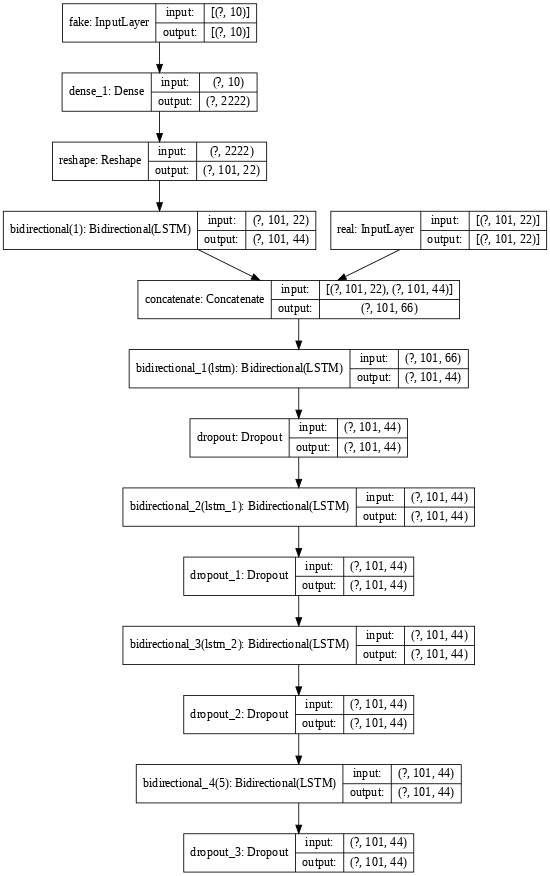

In [ ]:
tf.keras.utils.plot_model(generator,show_shapes=True,expand_nested=True,dpi=60,to_file='./generator.png')

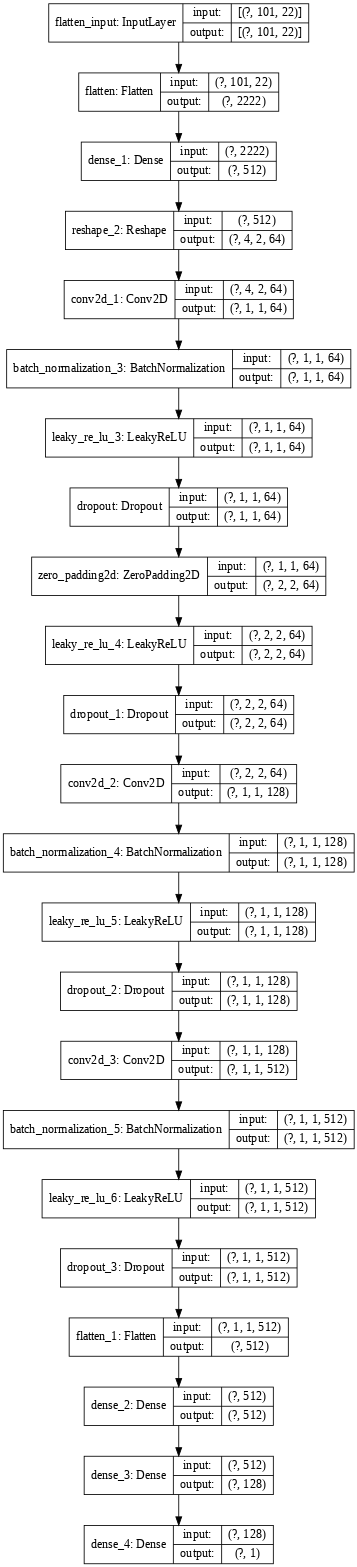

In [ ]:
tf.keras.utils.plot_model(discriminator,show_shapes=True,dpi=60, to_file='./discriminator.png')

### **2.2.4 Fonctions de cout (Minimax/Wasserstein)**

In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def minimax_loss (x,z):
  real_loss = cross_entropy(tf.ones_like(x), x)
  fake_loss =cross_entropy(tf.zeros_like(z), z)
  return real_loss+fake_loss
  
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)  

In [ ]:
def critic_loss(x,z):
  return x-z

In [ ]:
minimax_loss_metrics = tf.keras.metrics.Mean(name='minimax_loss_loss')
generateur_loss_metrics = tf.keras.metrics.Mean(name='generateur_loss_loss')

accuracy_real_metrics = tf.keras.metrics.Accuracy(name='accuracy_real')
accuracy_fake_metrics = tf.keras.metrics.Accuracy(name='accuracy_fake')

### **2.2.5 Optimizer**

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4) 
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4) 

### **2.2.6 Checkpoint**

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,discriminator_optimizer=discriminator_optimizer,generator=generator,discriminator=discriminator)

### **2.2.7 Entrainement**

In [ ]:
loss_history=[]
accuracy=[]

In [ ]:
@tf.function
def train_step(Angles):
    Z_p = tf.random.normal([Angles.shape[0],10])
    
    
    with   tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape :
            generated_Angles = generator(Z_p, training=True)
        
            real_output = discriminator(Angles, training=True)
            fake_output = discriminator(generated_Angles, training=True)
            
        
            #global_loss=minima_loss(real_output,fake_output)
            #critic= critic_loss(real_output,fake_output)
            
                
            gen_loss = generator_loss(fake_output)
            disc_loss = minimax_loss(real_output, fake_output)
                
            
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator,generator.trainable_variables) )
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator,discriminator.trainable_variables) )

    minimax_loss_metrics(disc_loss)
    generateur_loss_metrics(gen_loss)
    

    

In [ ]:
def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()
        
        for Angles_batch in dataset:
                train_step(Angles_batch)
                
                 
        if (epoch + 1) % 15 == 0:
              checkpoint.save(file_prefix = checkpoint_prefix)
        loss_history.append((minimax_loss_metrics.result().numpy(),generateur_loss_metrics.result().numpy()))
        print ("Accuracy_real:",accuracy_real_metrics.result().numpy()*100,"Accuracy_fake:",accuracy_fake_metrics.result().numpy()*100,"minimax_loss:",minimax_loss_metrics.result().numpy(),"generateur_loss:",generateur_loss_metrics.result().numpy())
        accuracy.append((accuracy_real_metrics.result().numpy(),accuracy_fake_metrics.result().numpy()))
        print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))
        
        minimax_loss_metrics.reset_states()
        generateur_loss_metrics.reset_states()
        
        
        
  

In [ ]:
epochs = 1000
train(dataset,epochs)

Accuracy_real: 0.0 Accuracy_fake: 0.0 minimax_loss: 1.4395801 generateur_loss: 0.47367188
Time for epoch 1 is 60.758692264556885 sec
Accuracy_real: 0.0 Accuracy_fake: 0.0 minimax_loss: 1.4350218 generateur_loss: 0.4736487
Time for epoch 2 is 10.172255992889404 sec
Accuracy_real: 0.0 Accuracy_fake: 0.0 minimax_loss: 1.4289105 generateur_loss: 0.47426942
Time for epoch 3 is 10.17757773399353 sec
Accuracy_real: 0.0 Accuracy_fake: 0.0 minimax_loss: 1.4228846 generateur_loss: 0.47448462
Time for epoch 4 is 10.183209657669067 sec
Accuracy_real: 0.0 Accuracy_fake: 0.0 minimax_loss: 1.4183894 generateur_loss: 0.47344998
Time for epoch 5 is 10.132582664489746 sec
Accuracy_real: 0.0 Accuracy_fake: 0.0 minimax_loss: 1.4158959 generateur_loss: 0.47104093
Time for epoch 6 is 10.096489667892456 sec
Accuracy_real: 0.0 Accuracy_fake: 0.0 minimax_loss: 1.4142051 generateur_loss: 0.4682798
Time for epoch 7 is 10.129548788070679 sec
Accuracy_real: 0.0 Accuracy_fake: 0.0 minimax_loss: 1.4115268 generateur

KeyboardInterrupt: ignored

### **2.2.8 Visualisation des courbes d'accuracy du discriminateur et les fonctions de cout**

In [ ]:
import matplotlib.pyplot as plt

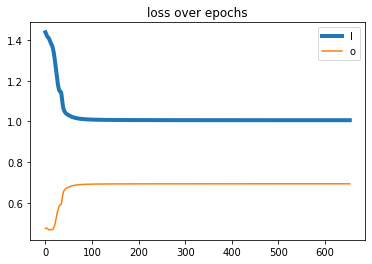

In [ ]:
x=range(len(loss_history))
loss_gen=[loss_history[i][0] for i in x]
loss_disc=[loss_history[i][1] for i in x]
lines = plt.plot(x, loss_gen,x,loss_disc)
plt.setp(lines[0], linewidth=4)



plt.legend(('loss_global'),loc='upper right')
           
plt.title('loss over epochs')
plt.savefig('./loss.png')
plt.show()

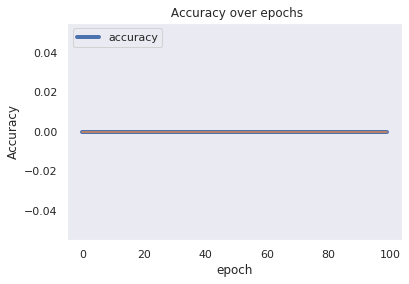

In [ ]:
x=range(len(accuracy))
acc=[accuracy[i] for i in x]

lines = plt.plot(x, acc)
plt.setp(lines[0], linewidth=4)


plt.title(' Accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'],loc='upper left')
plt.grid()
plt.savefig('./accuracy.png')
plt.show()

### **2.2.9 Visualisation des données simulées** 

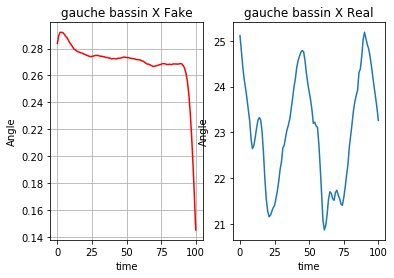

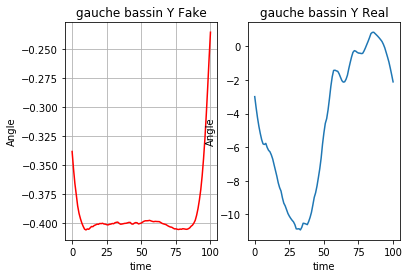

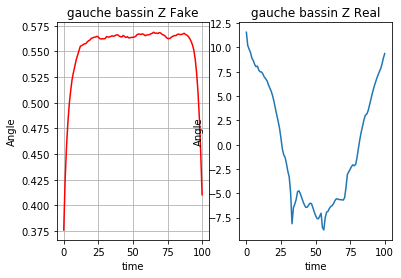

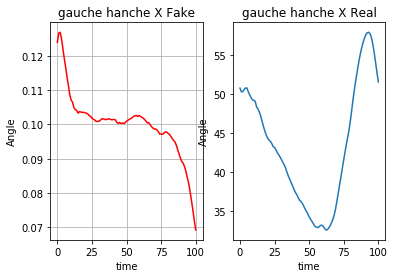

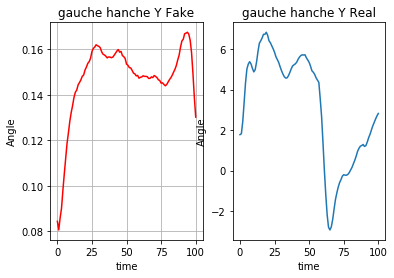

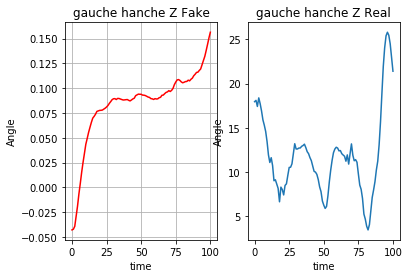

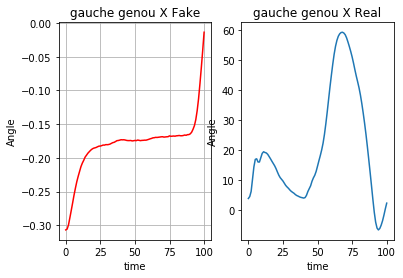

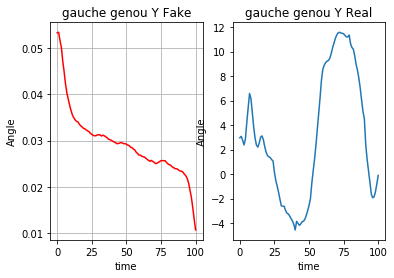

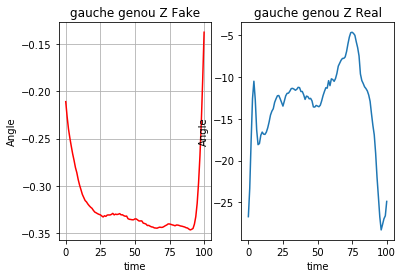

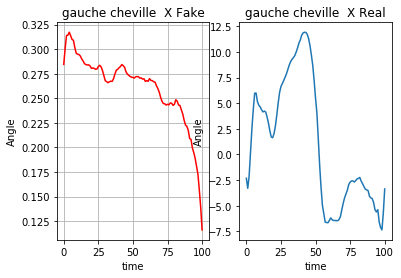

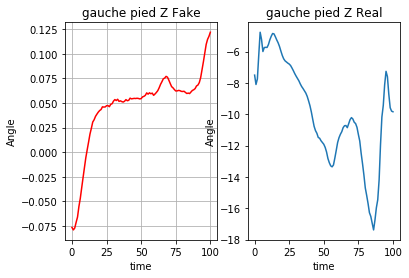

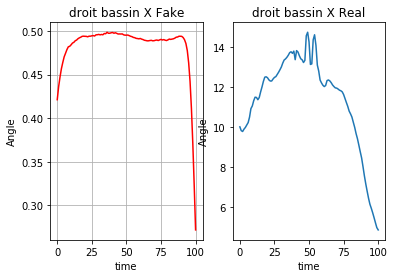

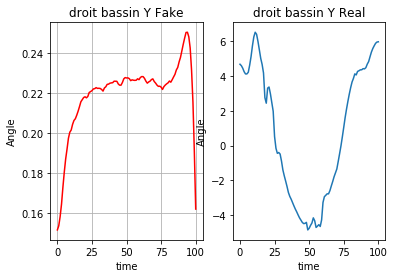

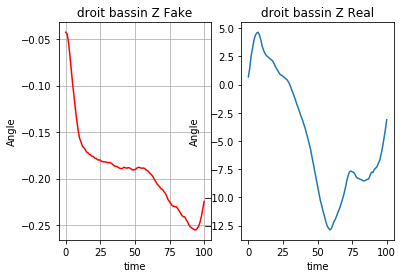

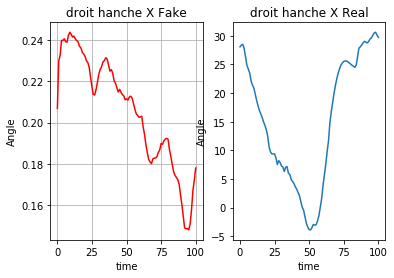

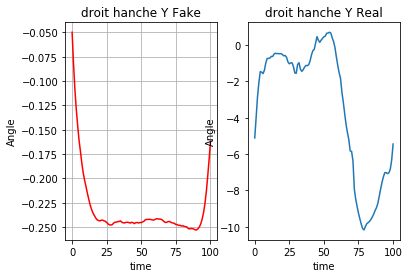

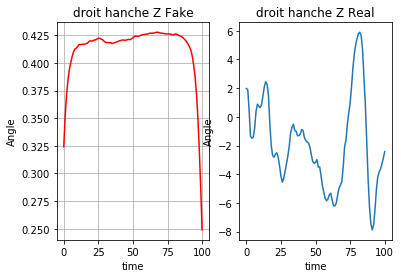

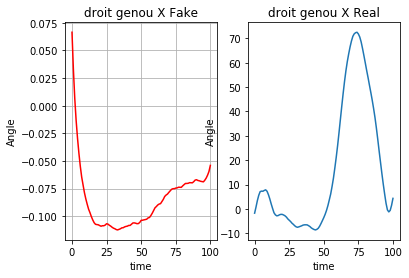

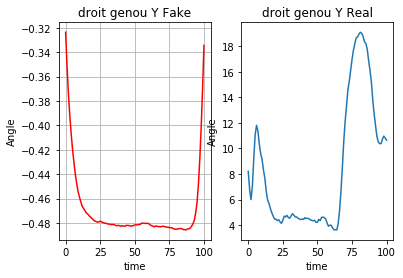

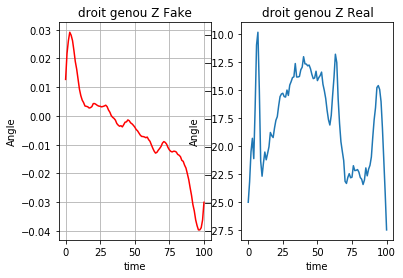

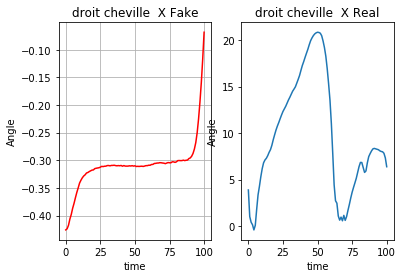

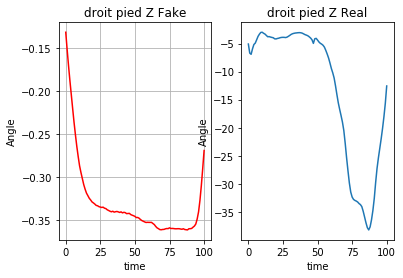

In [ ]:
with np.load('Data.npz') as data:  
    Angles= data['Input']
os.mkdir("./images")   
    
M=['bassin X','bassin Y','bassin Z',  'hanche X','hanche Y','hanche Z' ,'genou X','genou Y','genou Z', 'cheville  X' ,'pied Z'  ]
A=['gauche','droit']
m=1
for i in range (Angles.shape[2]):
    a=''
    if( i<11):
      a=A[0]+' '+M[i]
    else:
      a=A[1]+' '+M[i-11]  
    t = np.arange(101)
    h = np.random.choice(Angles.shape[0],1)
    s = Angles[h,t,i]
    seed = tf.random.normal([1, 10])
    v = generator(seed ,training=False).numpy()[0,:,i]
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(t,v,color='red')
    ax2.plot(t, s)
    ax1.set_xlabel('time')
    ax1.set_ylabel('Angle')
    ax2.set_xlabel('time')
    ax2.set_ylabel('Angle') 
    ax1.set_title(a+' Fake')  
    ax2.set_title(a+' Real')   
    plt.savefig('./images/'+str(m)+'.png')
        
    m+=1

    
    ax1.grid()
    
    
    plt.show()

### **2.2.10 Analyse des résultats**

#### **2.1.9.1 Mean Square Error**

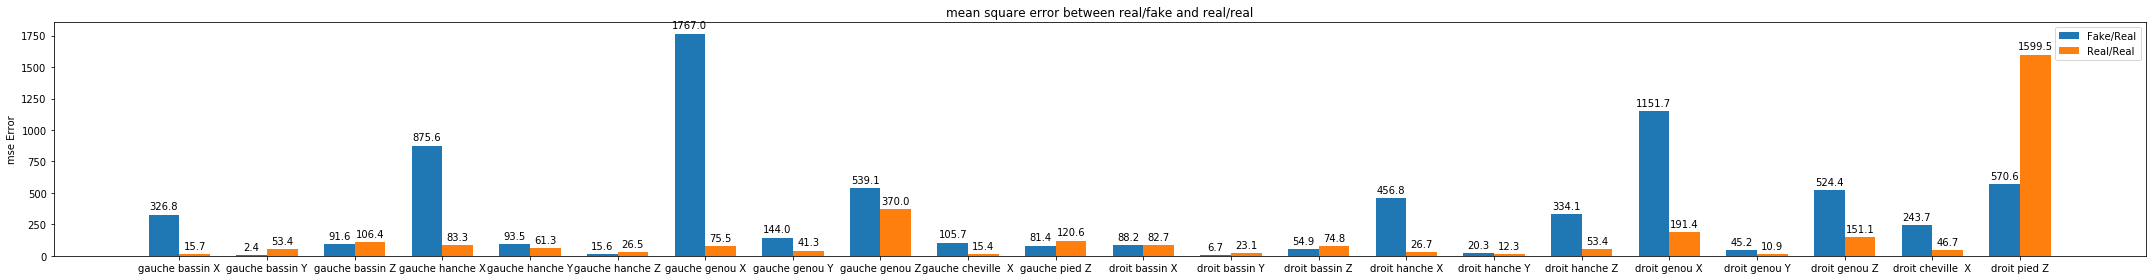

In [ ]:
mean_square_error_fake_real =[]
mean_square_error_real_real =[]
for i in range(Angles.shape[2]):
   v = np.random.choice(Angles.shape[0],1)
   seed = tf.random.normal([1, 10])
   generated = generator(seed ,training=False).numpy()[0,:,i]
   mean_square_error_fake_real.append(np.around(np.mean((Angles[v,:,i]-generated)**2),decimals=1)) 
   h = np.random.choice(Angles.shape[0],1)
   j = np.random.choice(Angles.shape[0],1)
   mean_square_error_real_real.append(np.around(np.mean((Angles[j,:,i]-Angles[h,:,i])**2),decimals=1))


M=['bassin X','bassin Y','bassin Z',  'hanche X','hanche Y','hanche Z' ,'genou X','genou Y','genou Z', 'cheville  X' ,'pied Z'  ]
A=['gauche','droit']
L=[]

for i in range (Angles.shape[2]):
    a=''
    if( i<11):
      a=A[0]+' '+M[i]
    else:
      a=A[1]+' '+M[i-11]
    L.append(a)

x = np.arange(len(L))  
width = 0.35  

fig, ax = plt.subplots(figsize=(30, 4))
rects1 = ax.bar(x - width/2, mean_square_error_fake_real, width,label='Fake/Real')
rects2 = ax.bar(x + width/2, mean_square_error_real_real, width, label='Real/Real')



ax.set_ylabel('mse Error')
ax.set_title('mean square error between real/fake and real/real')
ax.set_xticks(x)
ax.set_xticklabels(L)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.savefig('./mean_square_error.png')
plt.show()



#### **2.1.9.2 Taux d'erreur**

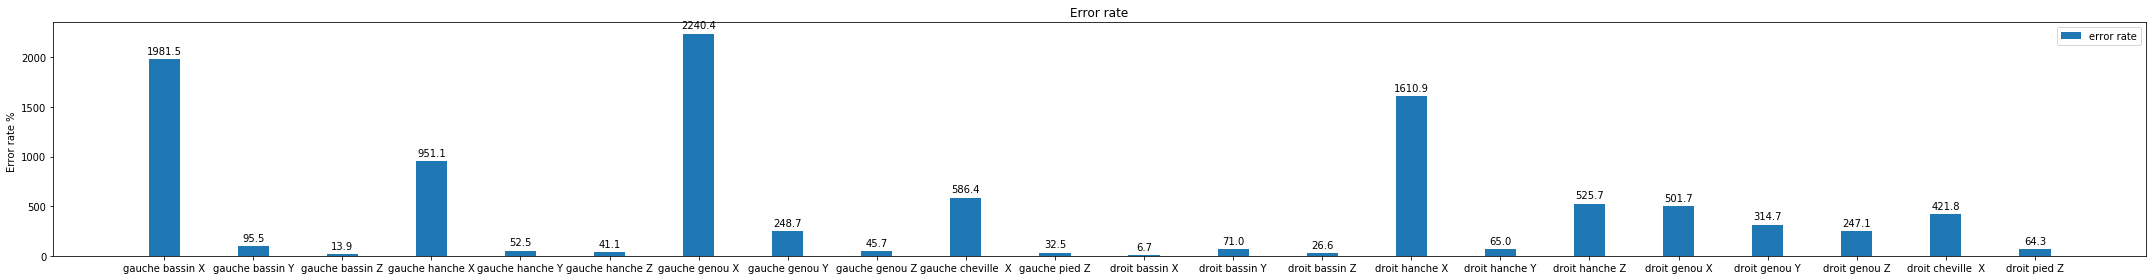

In [ ]:
error_rate=np.around(100*np.divide(abs(np.array(mean_square_error_fake_real)-np.array(mean_square_error_real_real)),np.array(mean_square_error_real_real)),decimals=1)
fig, ax = plt.subplots(figsize=(30, 4))
rects1 = ax.bar(x , error_rate, width,label='error rate')

ax.set_ylabel('Error rate % ')
ax.set_title('Error rate')
ax.set_xticks(x)
ax.set_xticklabels(L)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)


fig.tight_layout()
plt.savefig('./error_rate.png')
plt.show()

#### **2.1.9.3 Intervalle de variance**

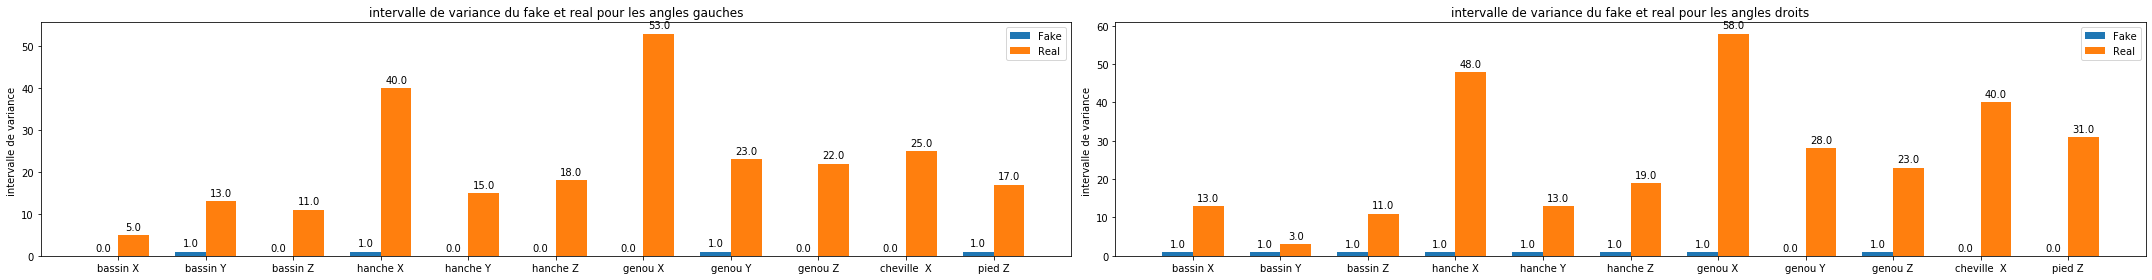

In [ ]:
delta_v_fake =[]
delta_v_real =[]
for i in range(Angles.shape[2]):
   v = np.random.choice(Angles.shape[0],1)
   seed = tf.random.normal([1, 10])
   generated = generator(seed ,training=False).numpy()[0,:,i]
   delta_v_fake.append(np.around((np.amax(generated)-np.amin(generated)))) 
   h = np.random.choice(Angles.shape[0],1)
   delta_v_real.append(np.around(np.amax(Angles[h,:,i])-np.amin(Angles[h,:,i])))


M=['bassin X','bassin Y','bassin Z',  'hanche X','hanche Y','hanche Z' ,'genou X','genou Y','genou Z', 'cheville  X' ,'pied Z'  ]

x = np.arange(11) 
width = 0.35  

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(30, 4))
rects1 = ax1.bar(x - width/2, delta_v_fake[:11], width,label='Fake')
rects2 = ax1.bar(x + width/2, delta_v_real[:11], width, label='Real')

rects3 = ax2.bar(x - width/2, delta_v_fake[11:], width,label='Fake')
rects4 = ax2.bar(x + width/2, delta_v_real[11:], width, label='Real')

ax1.set_ylabel('intervalle de variance ')
ax1.set_title('intervalle de variance du fake et real pour les angles gauches')
ax1.set_xticks(x)
ax1.set_xticklabels(M)
ax1.legend()
ax2.set_ylabel('intervalle de variance ')
ax2.set_title('intervalle de variance du fake et real pour les angles droits')
ax2.set_xticks(x)
ax2.set_xticklabels(M)
ax2.legend()

def autolabel1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax1.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax2.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel1(rects1)
autolabel1(rects2)
autolabel2(rects3)
autolabel2(rects4)

fig.tight_layout()
plt.savefig('./intervalle_variance.png')
plt.show()

####**2.1.9.4 Variance / Moyenne**

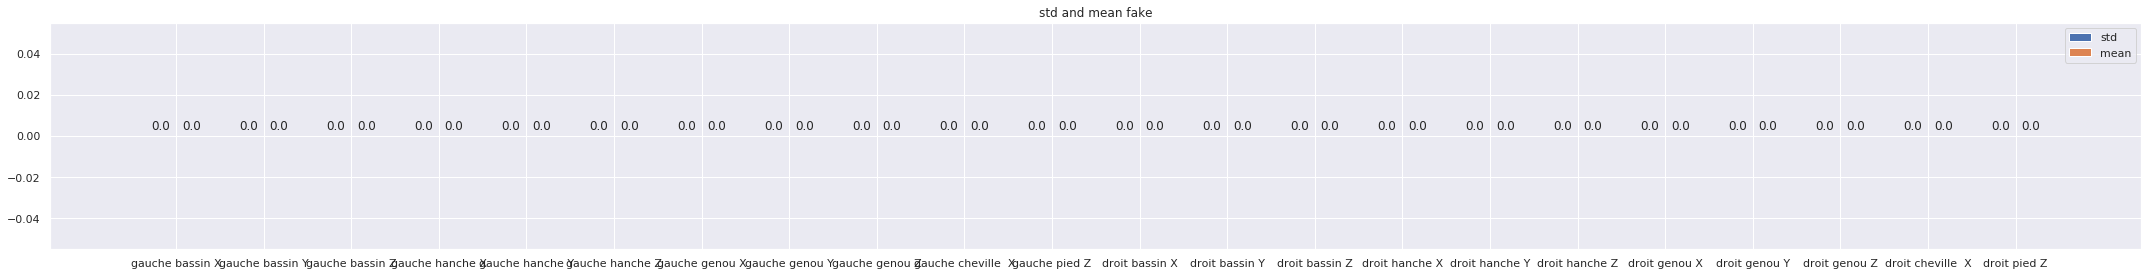

In [ ]:
seed = tf.random.normal([1, 10])
generated = generator(seed ,training=False).numpy()[0,:,:]
std_fake = np.around( np.std( generated, axis=0))

v = np.random.choice(Angles.shape[0],1)
mean_fake = np.around(np.mean( generated,axis=0))

M=['bassin X','bassin Y','bassin Z',  'hanche X','hanche Y','hanche Z' ,'genou X','genou Y','genou Z', 'cheville  X' ,'pied Z'  ]
A=['gauche','droit']
L=[]

for i in range (Angles.shape[2]):
    a=''
    if( i<11):
      a=A[0]+' '+M[i]
    else:
      a=A[1]+' '+M[i-11]
    L.append(a)

x = np.arange(len(L))  
width = 0.35  

fig, ax = plt.subplots(figsize=(30, 4))
rects1 = ax.bar(x - width/2,std_fake, width,label='std')
rects2 = ax.bar(x + width/2, mean_fake, width, label='mean')



#ax.set_ylabel('std')
ax.set_title('std and mean fake')
ax.set_xticks(x)
ax.set_xticklabels(L)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.savefig('./std.png')
plt.show()




# **3.C-GAN**


## **2.2 Une seule fonction de cout  GAN(Minimax) / WGAN(Wasserstein Loss)**

La particularité dans ces deux fonctions c'est que la fonction de cout du discriminateur dépend de la fonction de cout du générateur.

Bibliographie: 

1.   GAN : https://developers.google.com/machine-learning/gan/loss
2.   WGAN : https://lilianweng.github.io/lil-log/2017/08/20/from-GAN-to-WGAN.html


    



**Minimax loss:**

minima_loss = Ex[log(D(x)]+Ez[log(1-D(G(z))]

Generateur minimise la fonction Cout. => Gradient descent

Discriminateur maximise la fonction Cout. => Gradient ascent

**Wasserstein Loss:**

Critic_loss = D(x)- D(G(z))

Generateur maximise la fonction D(G(z)).

Discriminateur maximise la fonction Critic_loss.

In [ ]:
buffer_size,times_step,input_dimension=Angles.shape
print(Angles.shape)

loss_history = []
accuracy = []
generated_angles=[]

batch_size=256

Angles=tf.convert_to_tensor(Angles,dtype=tf.float32)

epochs = 100
dataset=tf.data.Dataset.from_tensor_slices(Angles).shuffle(buffer_size).batch(batch_size)

(3823, 101, 22)


### **2.2.1 Générateur**

In [ ]:
def generateur(architecture):

  real = layers.Input(shape = (times_step,input_dimension), name='real')
  fake = layers.Input(shape = (10,), name='fake')

  if architecture=='LSTM':
    
    z = layers.Dense(times_step*input_dimension)(fake)
    z = layers.Reshape((times_step,input_dimension))(z)
    z = layers.Bidirectional(layers.LSTM(11,activation='tanh',return_sequences=True, recurrent_activation='sigmoid',name='1'))(z)
    h = layers.Average()([real, z])
    h = layers.Bidirectional(layers.LSTM(101,activation='tanh',return_sequences=True, recurrent_activation='sigmoid',name='1'))(h)
    h = layers.Bidirectional(layers.LSTM(101,activation='tanh',return_sequences=True, recurrent_activation='sigmoid',name='2'))(h)
    h = layers.Dropout(0.5)(h)
    h = layers.Dense(66)(h)
    h = layers.Dense(22)(h)

  elif architecture =='CNN' :
    z = layers.Dense(4*input_dimension)(fake)
    z = layers.Reshape((4,input_dimension))(z) 
    z = layers.Bidirectional(layers.LSTM(16,activation='relu',return_sequences=True, recurrent_activation='sigmoid',name='1'))(z)
    z = layers.Dropout(0.5)(z)
    
    h = layers.Conv1D(64,kernel_size=3, activation='relu')(real)
    h = layers.BatchNormalization()(h) 
    h = layers.Conv1D(32,kernel_size=3, activation='tanh')(h)
    h = layers.BatchNormalization()(h)
    h = layers.Concatenate(axis=1)([h,z])
    h = layers.Dense(22)(h) 

  model = tf.keras.Model(inputs=[real, fake], outputs=h,name='Generateur')
    


  return model

### **2.2.2 Discriminateur**

In [ ]:
def discriminateur(architecture,i):
    model = tf.keras.Sequential(name='Discriminateur')
    init = tf.random_normal_initializer(0., 0.02)
    if (architecture=="LSTM") :

      model.add(layers.Bidirectional(layers.LSTM(2**i,activation='tanh',return_sequences=True, recurrent_activation='sigmoid',kernel_initializer='glorot_normal'),input_shape=(times_step,input_dimension)))
      model.add(layers.Dropout(0.5))
      model.add(layers.Bidirectional(layers.LSTM(2**i,activation='tanh',return_sequences=True, recurrent_activation='sigmoid')))
      model.add(layers.Dropout(0.5))
      model.add(layers.Bidirectional(layers.LSTM(2**i,activation='tanh',return_sequences=True, recurrent_activation='sigmoid')))
      model.add(layers.Dropout(0.5))
      model.add(layers.Flatten())
      model.add(layers.Dense(1, activation='sigmoid'))
      
      
    elif (architecture=='CNN')  :
       model.add(layers.Flatten(input_shape=(times_step,input_dimension)))
       model.add(layers.Dense(512, use_bias=False))
       
       model.add(layers.Reshape((4, 2, 64)))
       model.add(layers.Conv2D(64, (4, 4), strides=(5, 5), padding='same',kernel_initializer=init))
       model.add(layers.BatchNormalization())
       model.add(layers.LeakyReLU(alpha=0.2))
       model.add(layers.Dropout(0.25))
       #model.add(layers.Dropout(0.5))
       model.add(layers.ZeroPadding2D(padding=((0,1),(0,1))))
       model.add(layers.LeakyReLU(alpha=0.2))
       model.add(layers.Dropout(0.25)) 
       model.add(layers.Conv2D(128, (4, 4), strides=(5, 5), padding='same',kernel_initializer=init))
       model.add(layers.BatchNormalization())
       model.add(layers.LeakyReLU(alpha=0.2))
       model.add(layers.Dropout(0.25))
       model.add(layers.Conv2D(512, (10,10), activation='tanh', padding='same',kernel_initializer=init))
       model.add(layers.BatchNormalization())
       model.add(layers.LeakyReLU(alpha=0.2))
       model.add(layers.Dropout(0.25))
       model.add(layers.Flatten())
       model.add(layers.Dense(512, activation='relu'))
       model.add(layers.Dense(128, activation='relu'))
       model.add(layers.Dense(1, activation='sigmoid'))
      
    return model


### **2.2.3 Construction des graphes des modèles**

In [ ]:
generator=generateur('LSTM')
discriminator=discriminateur('LSTM',1)


In [ ]:
generator.build((times_step,input_dimension))
generator.summary()
discriminator.build((times_step,input_dimension))
discriminator.summary()

Model: "Generateur"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
real (InputLayer)               [(None, 101, 22)]    0                                            
__________________________________________________________________________________________________
fake (InputLayer)               [(None, 10)]         0                                            
__________________________________________________________________________________________________
conv1d_22 (Conv1D)              (None, 99, 64)       4288        real[0][0]                       
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 132)          1452        fake[0][0]                       
_________________________________________________________________________________________

In [ ]:
def gan(generator,discriminator):

    discriminateur.trainable = False  
    fake = layers.Input(shape = (10,), name='Bruit_Gaussian')
    h = generator(fake)
    h = discriminator(h)
    model = tf.keras.Model(inputs=fake, outputs=h,name='GAN')
    

    return model

In [ ]:
gan_1 = gan(generator,discriminator)

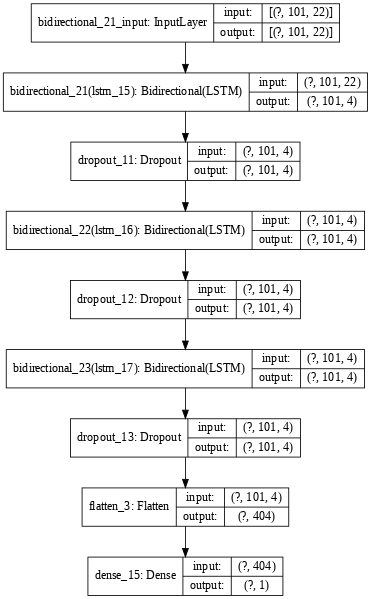

In [ ]:
tf.keras.utils.plot_model(,show_shapes=True,dpi=60,to_file='./gan_1.png')

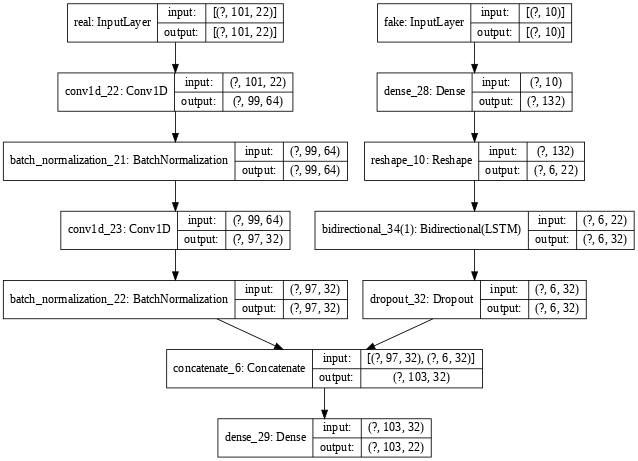

In [ ]:
tf.keras.utils.plot_model(generator,show_shapes=True,expand_nested=True,dpi=60,to_file='./generator.png')

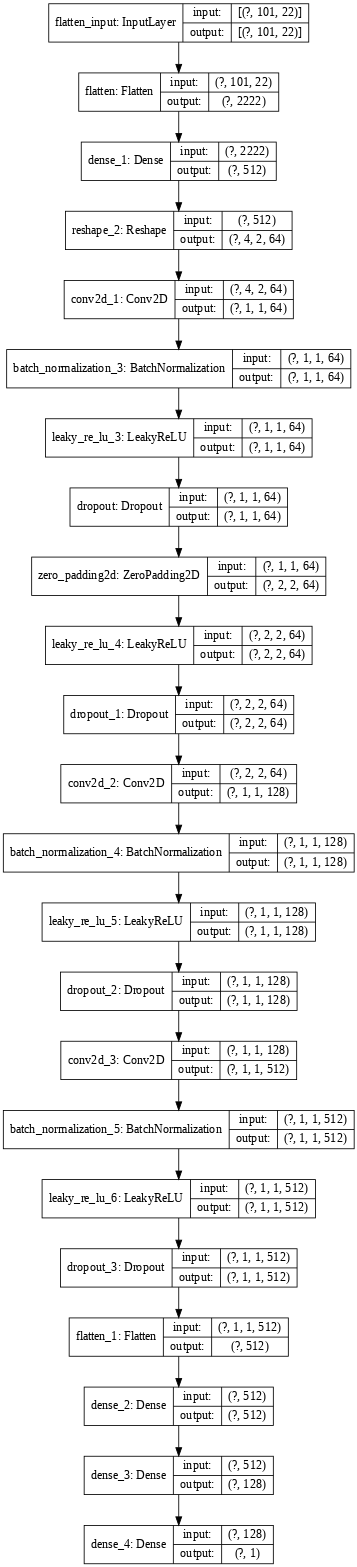

In [ ]:
tf.keras.utils.plot_model(discriminator,show_shapes=True,dpi=60, to_file='./discriminator.png')

### **2.2.4 Fonctions de cout (Minimax/Wasserstein)**

In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def minimax_loss (x,z):
  real_loss = cross_entropy(tf.ones_like(x), x)
  fake_loss =cross_entropy(tf.zeros_like(z), z)
  return real_loss+fake_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)  

In [ ]:
def critic_loss(x,z):
  return x-z

In [ ]:
#global_loss_metrics = tf.keras.metrics.Mean(name='global_loss')

minimax_loss_metrics = tf.keras.metrics.Mean(name='minimax_loss_loss')
generateur_loss_metrics = tf.keras.metrics.Mean(name='generateur_loss_loss')

accuracy_real_metrics = tf.keras.metrics.Accuracy(name='accuracy_real')
accuracy_fake_metrics = tf.keras.metrics.Accuracy(name='accuracy_fake')

### **2.2.5 Optimizer**

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4) 
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4) 

### **2.2.6 Checkpoint**

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,discriminator_optimizer=discriminator_optimizer,generator=generator,discriminator=discriminator)

### **2.2.7 Entrainement**

In [ ]:
loss_history=[]
accuracy=[]
weight = []

In [ ]:
@tf.function
def train_step(Angles):
    Z_p = tf.random.normal([Angles.shape[0],40])
    
    
    with   tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape :
            generated_Angles = generator([Angles,Z_p], training=True)
        
            real_output = discriminator(Angles, training=True)
            fake_output = discriminator(generated_Angles, training=True)
            
        
            #global_loss=minima_loss(real_output,fake_output)
            #critic= critic_loss(real_output,fake_output)
            
                
            gen_loss = generator_loss(fake_output)
            disc_loss = minimax_loss(real_output, fake_output)
                
            
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator,generator.trainable_variables) )
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator,discriminator.trainable_variables) )

    minimax_loss_metrics(disc_loss)
    generateur_loss_metrics(gen_loss)
    
    

    

In [ ]:
def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()
        
        for Angles_batch in dataset:
                train_step(Angles_batch)
                
        weight.append(generator.trainable_variables)          
        if (epoch + 1) % 15 == 0:
              checkpoint.save(file_prefix = checkpoint_prefix)
        loss_history.append((minimax_loss_metrics.result().numpy(),generateur_loss_metrics.result().numpy()))
        print ("Accuracy_real:",accuracy_real_metrics.result().numpy()*100,"Accuracy_fake:",accuracy_fake_metrics.result().numpy()*100,"minimax_loss:",minimax_loss_metrics.result().numpy(),"generateur_loss:",generateur_loss_metrics.result().numpy())
        accuracy.append((accuracy_real_metrics.result().numpy(),accuracy_fake_metrics.result().numpy()))
        print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))
        
        minimax_loss_metrics.reset_states()
        generateur_loss_metrics.reset_states()
        accuracy_real_metrics.reset_states()
        accuracy_fake_metrics.reset_states()
        
  

In [ ]:
epochs = 1000
train(dataset,epochs)

Accuracy_real: 0.0 Accuracy_fake: 0.0 minimax_loss: 1.4692314 generateur_loss: 0.45932102
Time for epoch 1 is 82.76649069786072 sec
Accuracy_real: 0.0 Accuracy_fake: 0.0 minimax_loss: 1.490186 generateur_loss: 0.44733974
Time for epoch 2 is 33.44051456451416 sec
Accuracy_real: 0.0 Accuracy_fake: 0.0 minimax_loss: 1.4938433 generateur_loss: 0.44550166
Time for epoch 3 is 33.47643828392029 sec
Accuracy_real: 0.0 Accuracy_fake: 0.0 minimax_loss: 1.487494 generateur_loss: 0.44920412
Time for epoch 4 is 34.60253429412842 sec
Accuracy_real: 0.0 Accuracy_fake: 0.0 minimax_loss: 1.4779321 generateur_loss: 0.4545552
Time for epoch 5 is 33.517181158065796 sec
Accuracy_real: 0.0 Accuracy_fake: 0.0 minimax_loss: 1.4697446 generateur_loss: 0.46010256
Time for epoch 6 is 33.61133646965027 sec
Accuracy_real: 0.0 Accuracy_fake: 0.0 minimax_loss: 1.4637802 generateur_loss: 0.46390826
Time for epoch 7 is 34.41678762435913 sec
Accuracy_real: 0.0 Accuracy_fake: 0.0 minimax_loss: 1.4566506 generateur_loss:

KeyboardInterrupt: ignored

In [ ]:
print(len(weight))
#for i in range(len(weight)):
  
#  print(weight[i][12])

350


### **2.2.8 Visualisation des courbes d'accuracy du discriminateur et les fonctions de cout**

In [ ]:
import matplotlib.pyplot as plt

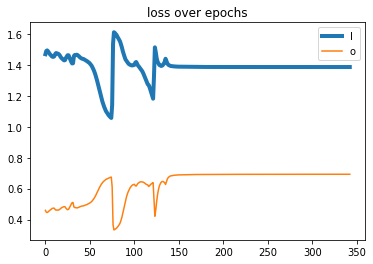

In [ ]:
x=range(len(loss_history))
loss_gen=[loss_history[i][0] for i in x]
loss_disc=[loss_history[i][1] for i in x]
lines = plt.plot(x, loss_gen,x,loss_disc)
plt.setp(lines[0], linewidth=4)



plt.legend(('loss_global'),loc='upper right')
           
plt.title('loss over epochs')
plt.savefig('./loss.png')
plt.show()

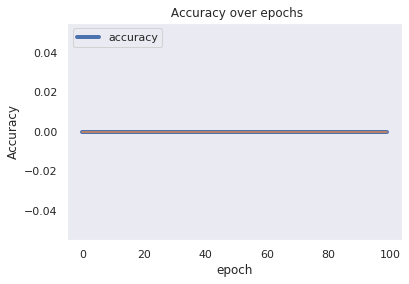

In [ ]:
x=range(len(accuracy))
acc=[accuracy[i] for i in x]

lines = plt.plot(x, acc)
plt.setp(lines[0], linewidth=4)


plt.title(' Accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'],loc='upper left')
plt.grid()
plt.savefig('./accuracy.png')
plt.show()

### **2.2.9 Visualisation des données simulées** 

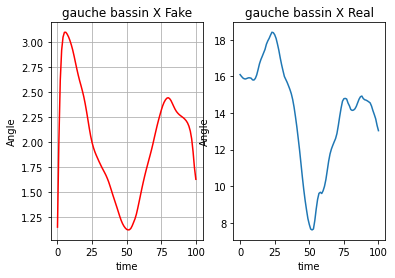

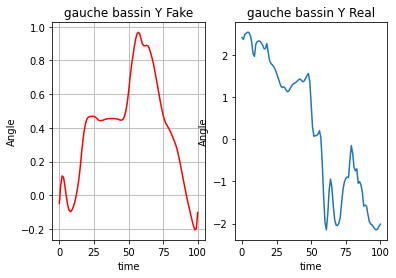

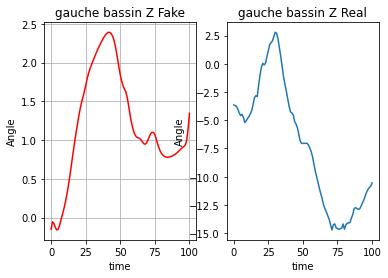

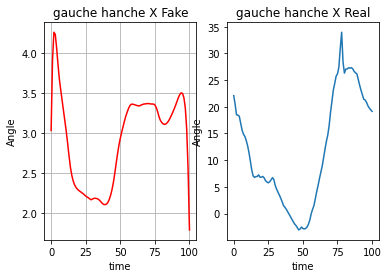

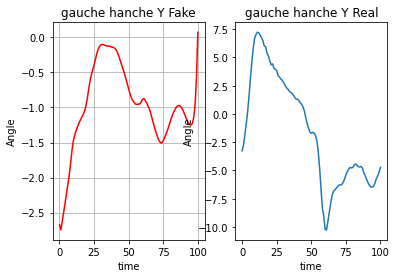

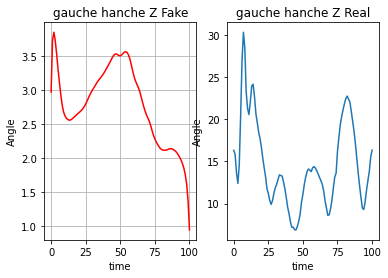

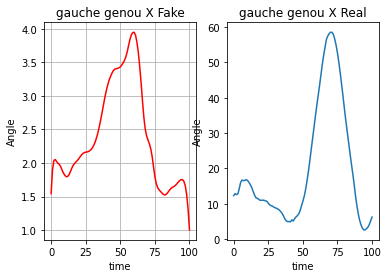

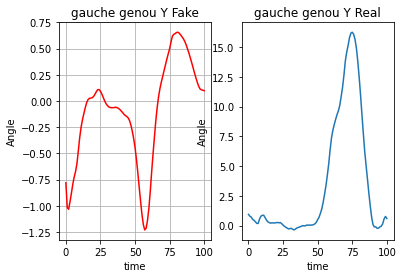

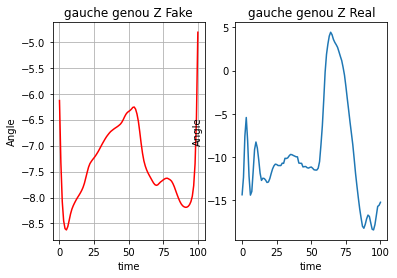

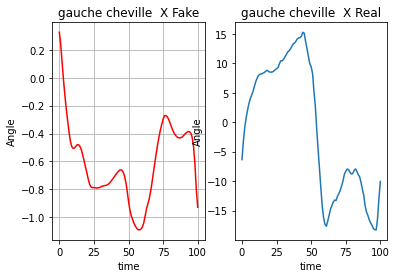

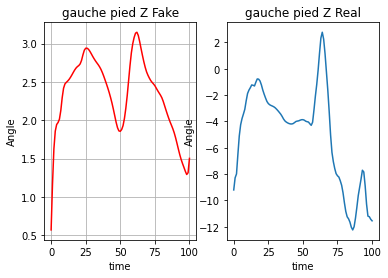

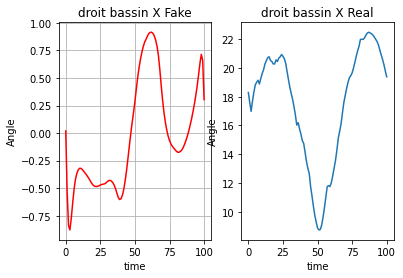

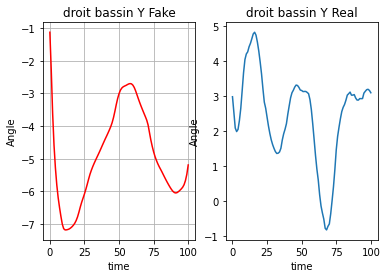

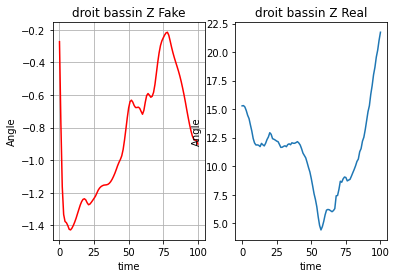

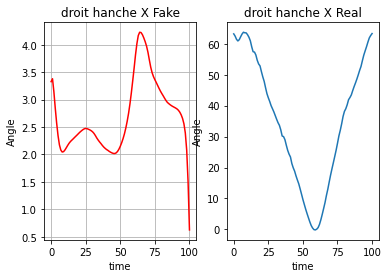

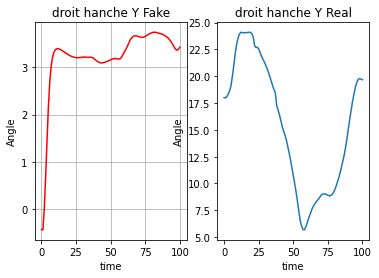

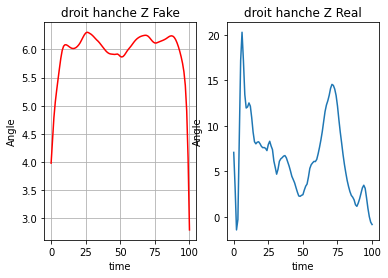

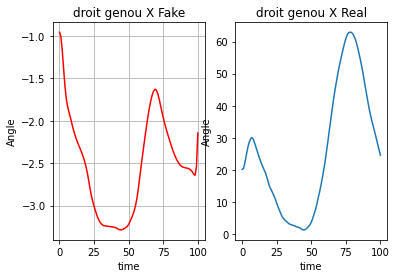

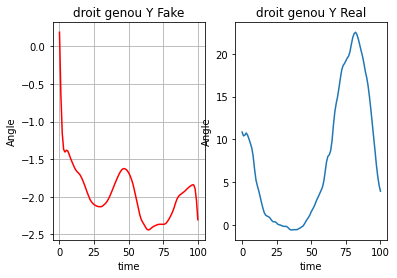

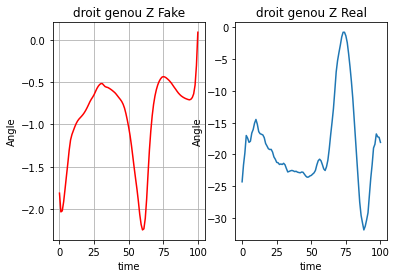

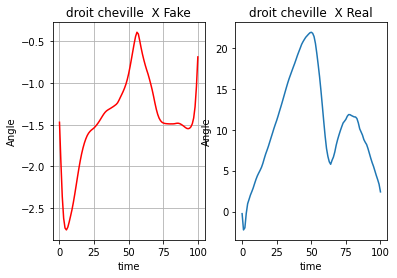

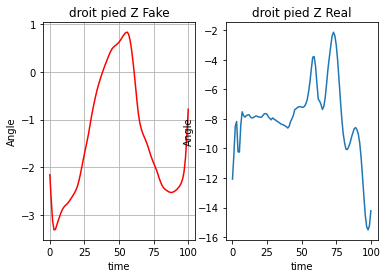

In [ ]:
with np.load('Data.npz') as data:  
    Angles= data['Input']
  
os.mkdir("./images")   
    
M=['bassin X','bassin Y','bassin Z',  'hanche X','hanche Y','hanche Z' ,'genou X','genou Y','genou Z', 'cheville  X' ,'pied Z'  ]
A=['gauche','droit']
m=1
for i in range (Angles.shape[2]):
    a=''
    if( i<11):
      a=A[0]+' '+M[i]
    else:
      a=A[1]+' '+M[i-11]  
    t = np.arange(Angles.shape[1])
    h = np.random.choice(Angles.shape[0],1)
    s = Angles[h,t,i]
    seed = tf.random.normal([1, 20])
    v = generator([Angles[h,:,:],seed] ,training=False).numpy()[0,:,i]
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(t,v,color='red')
    ax2.plot(t, s)
    ax1.set_xlabel('time')
    ax1.set_ylabel('Angle')
    ax2.set_xlabel('time')
    ax2.set_ylabel('Angle') 
    ax1.set_title(a+' Fake')  
    ax2.set_title(a+' Real')   
    plt.savefig('./images/'+str(m)+'.png')
        
    m+=1

    
    ax1.grid()
    
    
    plt.show()

### **2.2.10 Analyse des résultats**

### **2.2.9 RMSE** 

In [ ]:
from sklearn.metrics import mean_squared_error as mse

seed = tf.random.normal([1, 40])
generated = generator([Angles[0,:,:],seed] ,training=False).numpy()[0,:,:]

RMSE_0 = np.sqrt(mse(generated,Angles[0,:,:]))
RMSE_min = min([np.sqrt(mse(generated,Angles[i,:,:])) for i in range(Angles.shape[0])])

print("RMSE_0 = "+str(RMSE_0),"RMSE_min ="+str(RMSE_min))

RMSE_0 = 13.712737 RMSE_min =10.081796


#### **2.1.9.1 Mean Square Error**

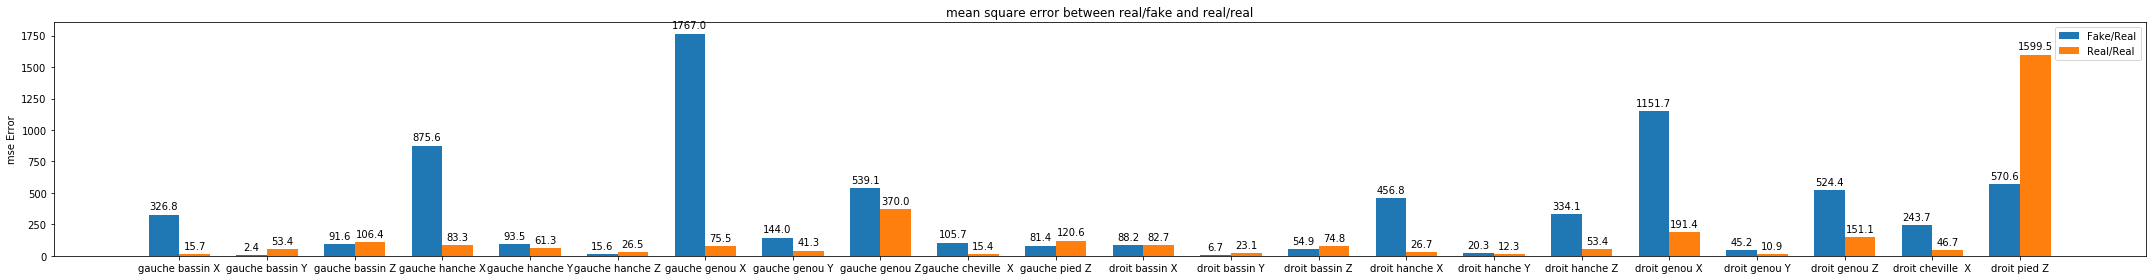

In [ ]:
mean_square_error_fake_real =[]
mean_square_error_real_real =[]
for i in range(Angles.shape[2]):
   v = np.random.choice(Angles.shape[0],1)
   seed = tf.random.normal([1, 10])
   generated = generator(seed ,training=False).numpy()[0,:,i]
   mean_square_error_fake_real.append(np.around(np.mean((Angles[v,:,i]-generated)**2),decimals=1)) 
   h = np.random.choice(Angles.shape[0],1)
   j = np.random.choice(Angles.shape[0],1)
   mean_square_error_real_real.append(np.around(np.mean((Angles[j,:,i]-Angles[h,:,i])**2),decimals=1))


M=['bassin X','bassin Y','bassin Z',  'hanche X','hanche Y','hanche Z' ,'genou X','genou Y','genou Z', 'cheville  X' ,'pied Z'  ]
A=['gauche','droit']
L=[]

for i in range (Angles.shape[2]):
    a=''
    if( i<11):
      a=A[0]+' '+M[i]
    else:
      a=A[1]+' '+M[i-11]
    L.append(a)

x = np.arange(len(L))  
width = 0.35  

fig, ax = plt.subplots(figsize=(30, 4))
rects1 = ax.bar(x - width/2, mean_square_error_fake_real, width,label='Fake/Real')
rects2 = ax.bar(x + width/2, mean_square_error_real_real, width, label='Real/Real')



ax.set_ylabel('mse Error')
ax.set_title('mean square error between real/fake and real/real')
ax.set_xticks(x)
ax.set_xticklabels(L)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.savefig('./mean_square_error.png')
plt.show()



#### **2.1.9.2 Taux d'erreur**

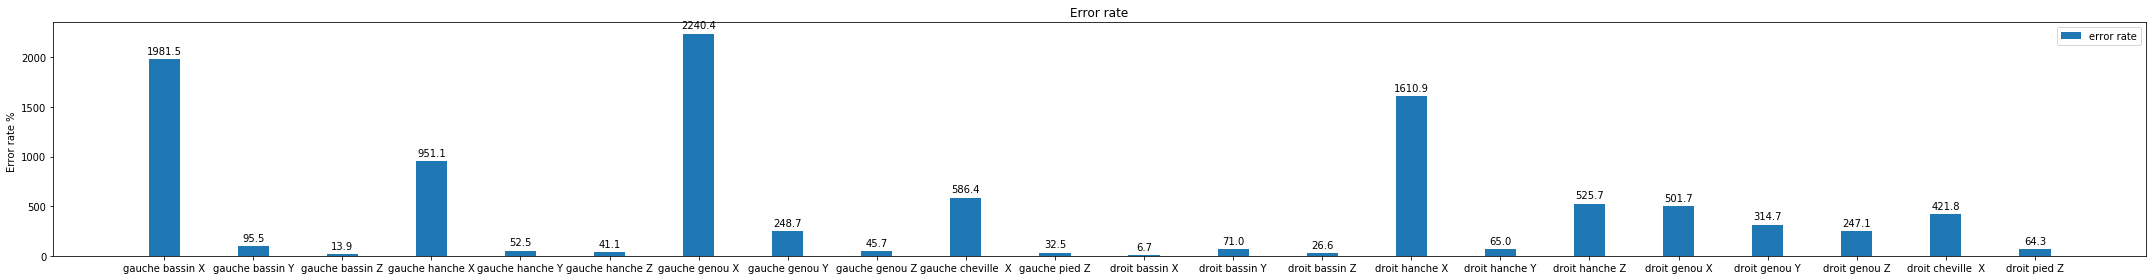

In [ ]:
error_rate=np.around(100*np.divide(abs(np.array(mean_square_error_fake_real)-np.array(mean_square_error_real_real)),np.array(mean_square_error_real_real)),decimals=1)
fig, ax = plt.subplots(figsize=(30, 4))
rects1 = ax.bar(x , error_rate, width,label='error rate')

ax.set_ylabel('Error rate % ')
ax.set_title('Error rate')
ax.set_xticks(x)
ax.set_xticklabels(L)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)


fig.tight_layout()
plt.savefig('./error_rate.png')
plt.show()

#### **2.1.9.3 Intervalle de variance**

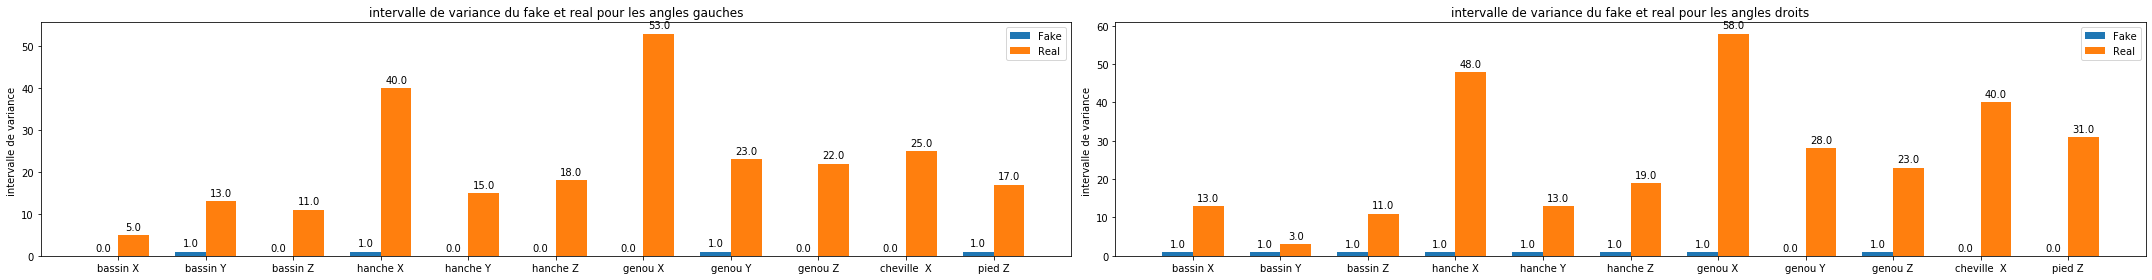

In [ ]:
delta_v_fake =[]
delta_v_real =[]
for i in range(Angles.shape[2]):
   v = np.random.choice(Angles.shape[0],1)
   seed = tf.random.normal([1, 10])
   generated = generator(seed ,training=False).numpy()[0,:,i]
   delta_v_fake.append(np.around((np.amax(generated)-np.amin(generated)))) 
   h = np.random.choice(Angles.shape[0],1)
   delta_v_real.append(np.around(np.amax(Angles[h,:,i])-np.amin(Angles[h,:,i])))


M=['bassin X','bassin Y','bassin Z',  'hanche X','hanche Y','hanche Z' ,'genou X','genou Y','genou Z', 'cheville  X' ,'pied Z'  ]

x = np.arange(11) 
width = 0.35  

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(30, 4))
rects1 = ax1.bar(x - width/2, delta_v_fake[:11], width,label='Fake')
rects2 = ax1.bar(x + width/2, delta_v_real[:11], width, label='Real')

rects3 = ax2.bar(x - width/2, delta_v_fake[11:], width,label='Fake')
rects4 = ax2.bar(x + width/2, delta_v_real[11:], width, label='Real')

ax1.set_ylabel('intervalle de variance ')
ax1.set_title('intervalle de variance du fake et real pour les angles gauches')
ax1.set_xticks(x)
ax1.set_xticklabels(M)
ax1.legend()
ax2.set_ylabel('intervalle de variance ')
ax2.set_title('intervalle de variance du fake et real pour les angles droits')
ax2.set_xticks(x)
ax2.set_xticklabels(M)
ax2.legend()

def autolabel1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax1.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax2.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel1(rects1)
autolabel1(rects2)
autolabel2(rects3)
autolabel2(rects4)

fig.tight_layout()
plt.savefig('./intervalle_variance.png')
plt.show()

####**2.1.9.4 Variance / Moyenne**

In [ ]:
seed = tf.random.normal([1, 10])
generated = generator(seed ,training=False).numpy()[0,:,:]
std_fake = np.around( np.std( generated, axis=0))

v = np.random.choice(Angles.shape[0],1)
mean_fake = np.around(np.mean( generated,axis=0))

M=['bassin X','bassin Y','bassin Z',  'hanche X','hanche Y','hanche Z' ,'genou X','genou Y','genou Z', 'cheville  X' ,'pied Z'  ]
A=['gauche','droit']
L=[]

for i in range (Angles.shape[2]):
    a=''
    if( i<11):
      a=A[0]+' '+M[i]
    else:
      a=A[1]+' '+M[i-11]
    L.append(a)

x = np.arange(len(L))  
width = 0.35  

fig, ax = plt.subplots(figsize=(30, 4))
rects1 = ax.bar(x - width/2,std_fake, width,label='std')
rects2 = ax.bar(x + width/2, mean_fake, width, label='mean')



#ax.set_ylabel('std')
ax.set_title('std and mean fake')
ax.set_xticks(x)
ax.set_xticklabels(L)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.savefig('./std.png')
plt.show()


